# Simple Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://www.geogebra.org/graphing - for viewing the equation visually online

In [2]:
"""
Module for Perceptron
"""

class Perceptron:
    def __init__(self, X, Y):
        """
        X: List having input vector, each vector used in Input layer
        Y: target output for each input listed in X
        """
        print('..........')
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.n = len(X[0]) # Total features count
        self.cost_list = []
        self.epoch_count = 0
        self.netsum_ = 0
        
    def calcNetSum(self, x):
        """
        Returns Net Sum (line estimation)
        """
        self.netsum_ = np.dot(x.T, self.w) + self.bias
        print('calcNetSum: ', self.netsum_)
        return self.netsum_
    
    def hardThresholdActFunction(self, netsum):
        """
        Performs Hard Threshold Activation Function
        netsum: Computed NetSum for the node
        threshold: Required threshold
        """
        return 1.0 if netsum >= self.t else 0.0
        if netsum >= self.t:
            return 1.0
        return 0.0
        
    def predict(self, x):
        self.calcNetSum(x)
        return self.hardThresholdActFunction(self.netsum_)
    
    def train(self, epoch=2000, eta=0.1, threshold=0.0, debug=True):
        """
        epoch: Total iteration to pass through for learning
        eta: learning parameter, 0 < eta < 1
        bias: Default bias to be used, 0 < bias < 1
        threshold: required threshold for hard threshold activation function
        """
        # Inital Weights
        self.w = np.random.uniform(0,1,self.n)
        #self.w = np.zeros(self.n)
        if debug == True:
            print('Initial Weights: ', self.w)
        
        # Initialize Bias
        #bias=np.random.uniform(0,1,1)
        self.bias = np.float(1.0)
        if debug == True:
            print('Initial Bias: ', self.bias)
        
        # Intialize ETA
        self.eta = eta
        
        # Initialize Threshold
        self.t = threshold
        
        self.epoch_count = 0
        for e_i in range(epoch):
            self.epoch_count = e_i
            predicted = []
            error_list = []
            misclassifed = 0
            epoch_cost = 0
            for i in range(len(X)):
                # Predict the output
                y_hat = self.predict(self.X[i])
                predicted.append(y_hat)
                
                # Compute the Loss
                loss = self.Y[i] - y_hat
                if(loss != 0):
                    misclassifed += 1
                    
                # Update Weights
                self.w += ((self.eta * loss) * self.X[i])
                self.bias += (self.eta * loss)
                
                # if you want to see how fitting progressess
                self.plot_data()
                
                if debug == True:
                    print("\tEpoch: {:04}-{:02}\ty_hat: {:02} \ty: {:02}".format(
                                                                            (e_i+1), i+1,
                                                                            y_hat,
                                                                            self.Y[i]), end='')
                    print("\t\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w[0],
                                                                          self.w[1],
                                                                          self.bias))


                # Compute Cost
                cost = np.square(loss)
                epoch_cost += np.float(cost/len(X))
                
            self.cost_list.append(epoch_cost)
                
            # print model improvements
            if debug == True:
                print("Epoch: {:04}\tMisclassifed: {:02} \tLoss: {:06.5f}".format(
                                                                        (e_i+1),
                                                                        misclassifed,
                                                                        epoch_cost), end='')
                print("\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w[0],
                                                                      self.w[1],
                                                                      self.bias), end='')
                print("\tPrediced: ", predicted)

            if (misclassifed == 0):
                break;
    
    def plot_data(self):
        print("Regression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w[0],
                                                                      self.w[1],
                                                                      self.bias))
        # fig config
        plt.figure(figsize=(10,6))
        plt.grid(True)

        #plot input samples(2D data points) and i have two classes. 
        #one is +1 and second one is -1, so it red color for +1 and blue color for -1
        for input,target in zip(self.X,self.Y):
            plt.plot(input[0],input[1],'bo' if (target == 1.0) else 'ro')

        # Here i am calculating slope and intercept with given three weights
        #slope = -(self.bias/self.w[1])/(self.bias/self.w[0])
        #y_intercept = -self.bias/self.w[0]
        slope = -((self.w[0] / self.w[1]))
        y_intercept = -(self.bias/self.w[1])
        print('Slope: ', slope, 'Y-Intercept: ', y_intercept)
        for i in np.linspace(np.amin(self.X[:,:1]),np.amax(self.X[:,:1])):

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + y_intercept
            plt.plot(i, y,'ko')
        plt.title('EPOCH {0}'.format(self.epoch_count+1))

In [3]:
# https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
X = np.array([[1, 1], [2,2], [4,4],[5,5]])
Y = np.array([0,0,1,1])

..........
Initial Weights:  [0.84261816 0.77935398]
Initial Bias:  1.0
calcNetSum:  2.6219721386744794
Regression: 0.74(X1) + 0.68(X2) + 0.90
Slope:  -1.0931240271827292 Y-Intercept:  -1.3247879991660667
	Epoch: 0001-01	y_hat: 1.0 	y: 00			Regression: 0.74(X1) + 0.68(X2) + 0.90
calcNetSum:  3.7439442773489584
Regression: 0.54(X1) + 0.48(X2) + 0.80
Slope:  -1.1319779977564395 Y-Intercept:  -1.6689128144112912
	Epoch: 0001-02	y_hat: 1.0 	y: 00			Regression: 0.54(X1) + 0.48(X2) + 0.80
calcNetSum:  4.887888554697917
Regression: 0.54(X1) + 0.48(X2) + 0.80
Slope:  -1.1319779977564395 Y-Intercept:  -1.6689128144112912
	Epoch: 0001-03	y_hat: 1.0 	y: 01			Regression: 0.54(X1) + 0.48(X2) + 0.80
calcNetSum:  5.909860693372396
Regression: 0.54(X1) + 0.48(X2) + 0.80
Slope:  -1.1319779977564395 Y-Intercept:  -1.6689128144112912
	Epoch: 0001-04	y_hat: 1.0 	y: 01			Regression: 0.54(X1) + 0.48(X2) + 0.80
Epoch: 0001	Misclassifed: 02 	Loss: 0.50000		Regression: 0.54(X1) + 0.48(X2) + 0.80	Prediced:  [1.

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


	Epoch: 0006-03	y_hat: 1.0 	y: 01			Regression: 0.04(X1) + -0.02(X2) + 0.10
calcNetSum:  0.20986069337239655
Regression: 0.04(X1) + -0.02(X2) + 0.10
Slope:  2.0642312059700796 Y-Intercept:  4.843548558184686
	Epoch: 0006-04	y_hat: 1.0 	y: 01			Regression: 0.04(X1) + -0.02(X2) + 0.10
Epoch: 0006	Misclassifed: 02 	Loss: 0.50000		Regression: 0.04(X1) + -0.02(X2) + 0.10	Prediced:  [1.0, 1.0, 1.0, 1.0]
calcNetSum:  0.12197213867447942
Regression: -0.06(X1) + -0.12(X2) + 0.00
Slope:  -0.4756215037045924 Y-Intercept:  1.1502897333365204e-15
	Epoch: 0007-01	y_hat: 1.0 	y: 00			Regression: -0.06(X1) + -0.12(X2) + 0.00
calcNetSum:  -0.35605572265104135
Regression: -0.06(X1) + -0.12(X2) + 0.00
Slope:  -0.4756215037045924 Y-Intercept:  1.1502897333365204e-15
	Epoch: 0007-02	y_hat: 0.0 	y: 00			Regression: -0.06(X1) + -0.12(X2) + 0.00
calcNetSum:  -0.7121114453020828
Regression: 0.34(X1) + 0.28(X2) + 0.10
Slope:  -1.2264660001948557 Y-Intercept:  -0.3579687676910752
	Epoch: 0007-03	y_hat: 0.0 	y: 0

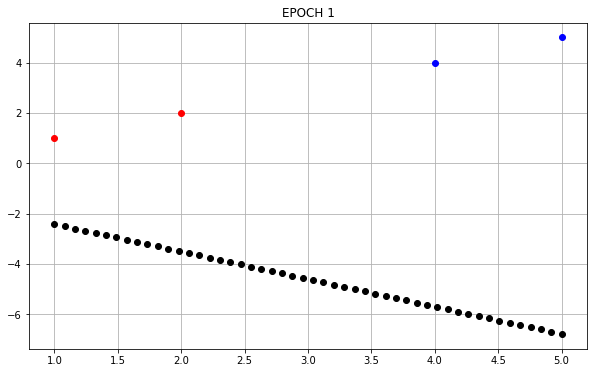

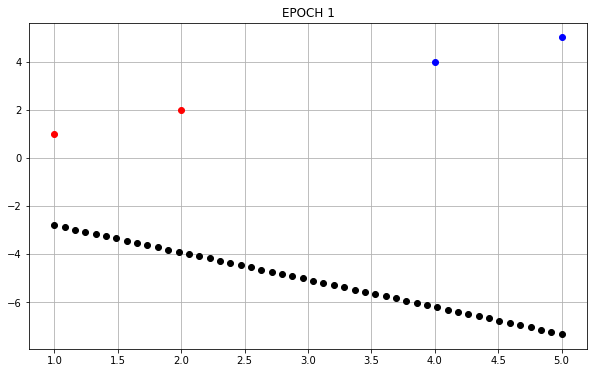

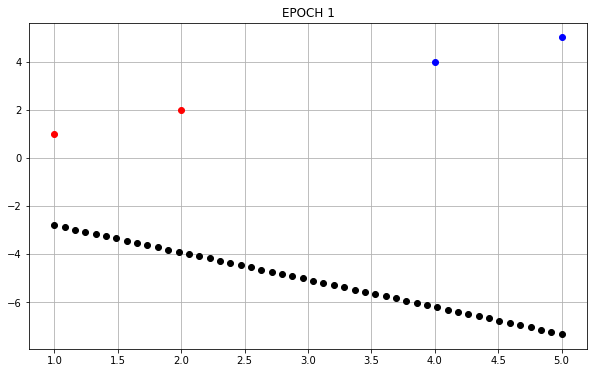

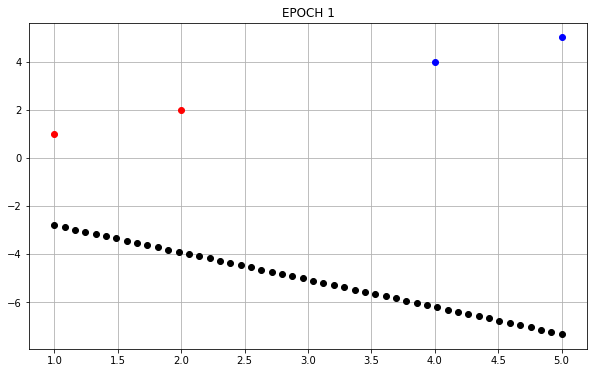

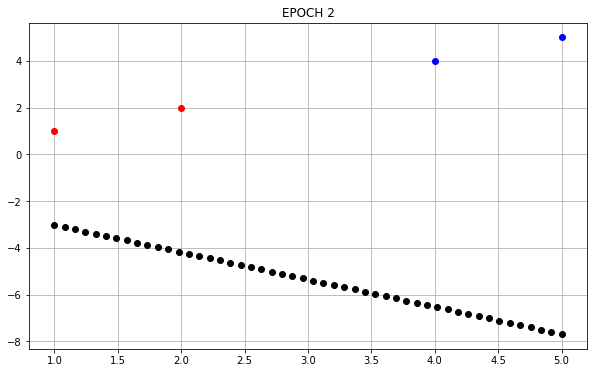

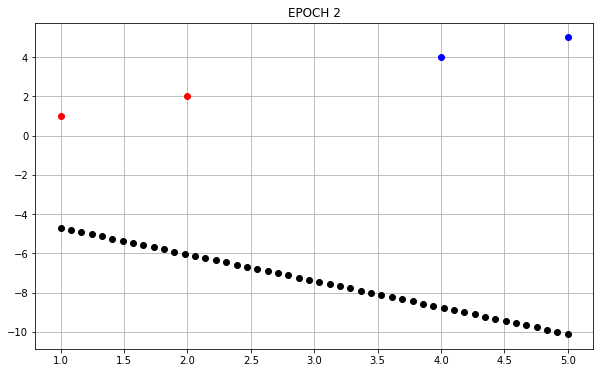

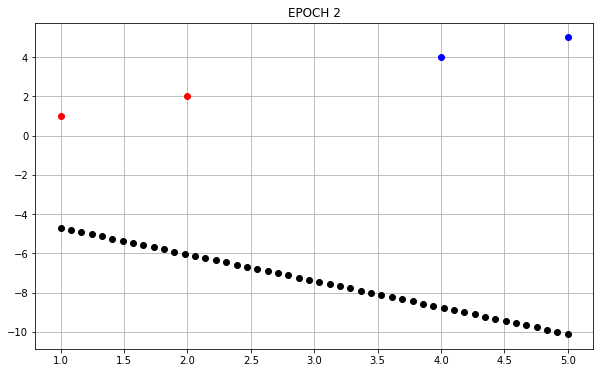

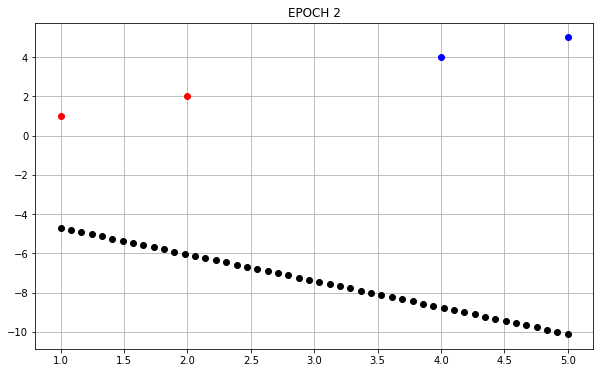

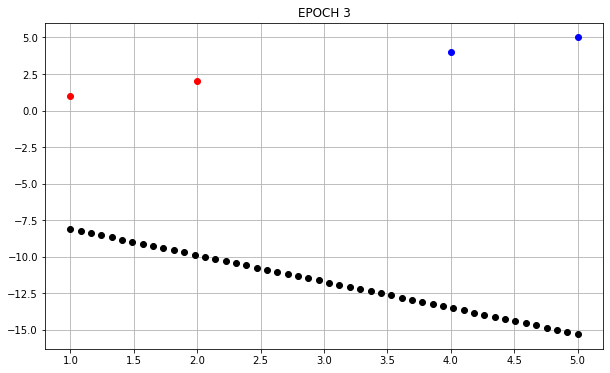

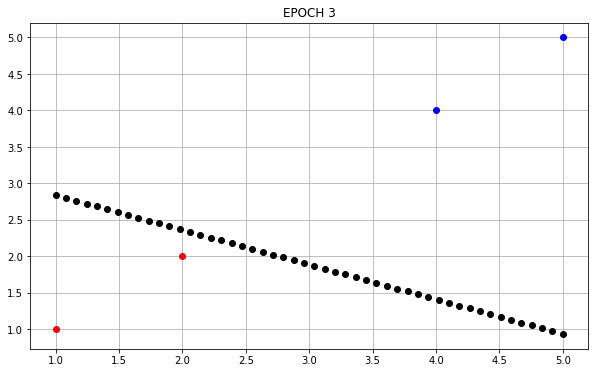

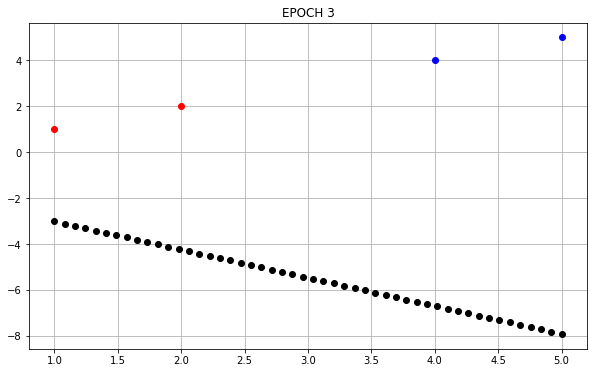

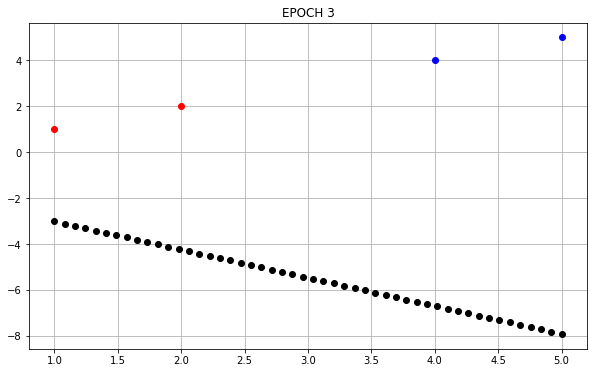

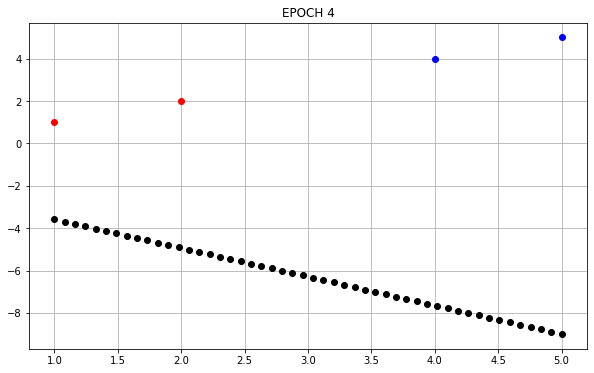

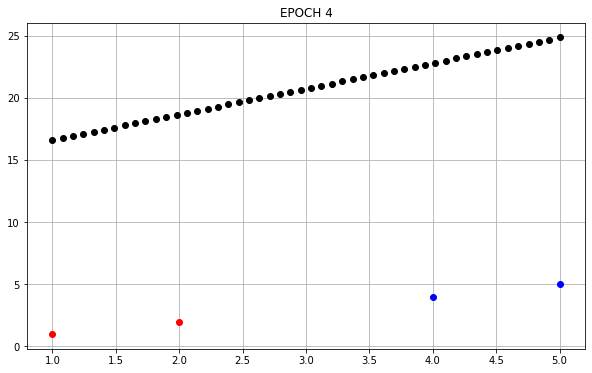

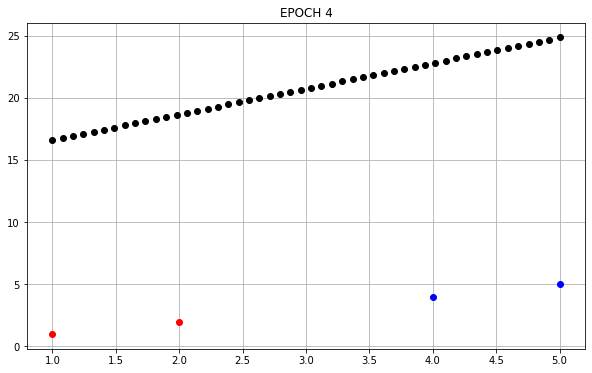

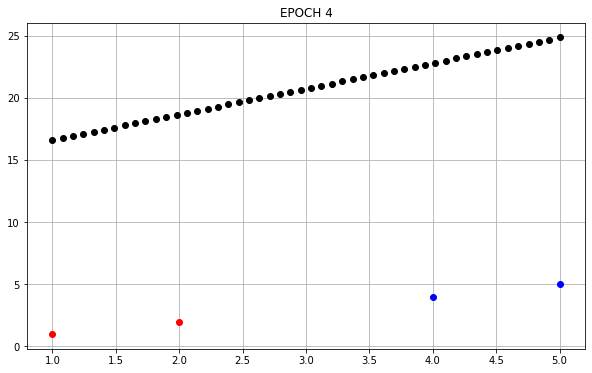

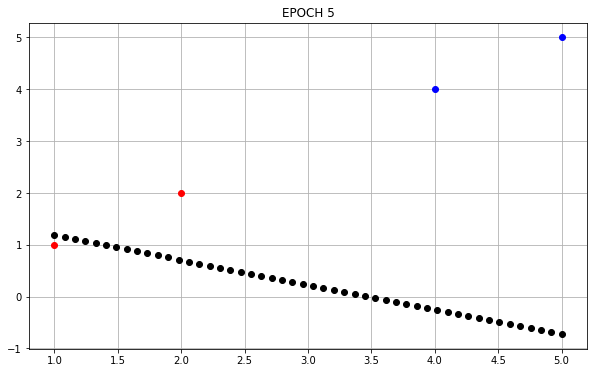

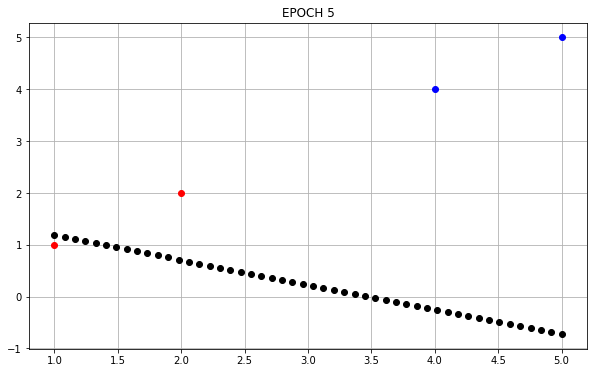

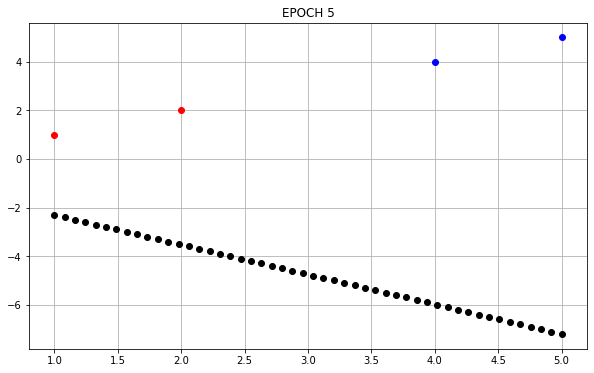

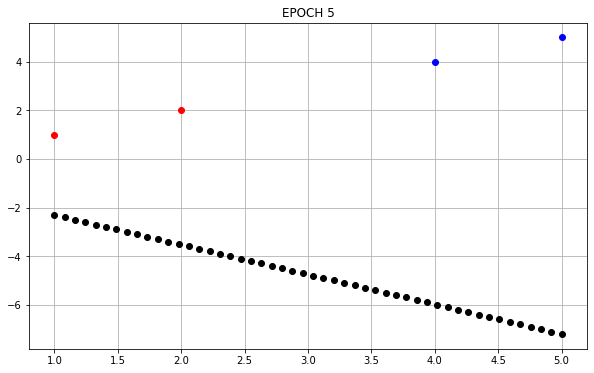

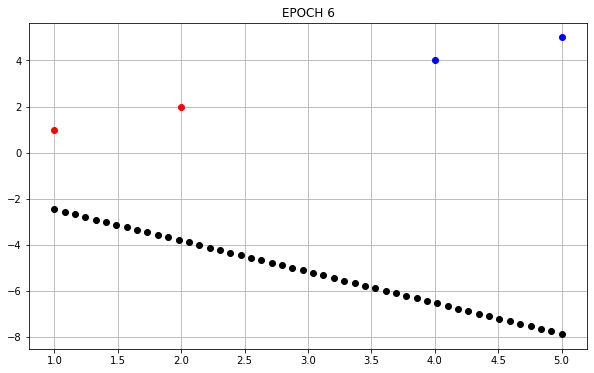

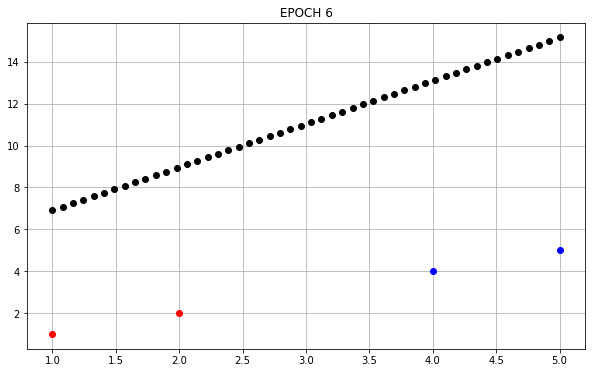

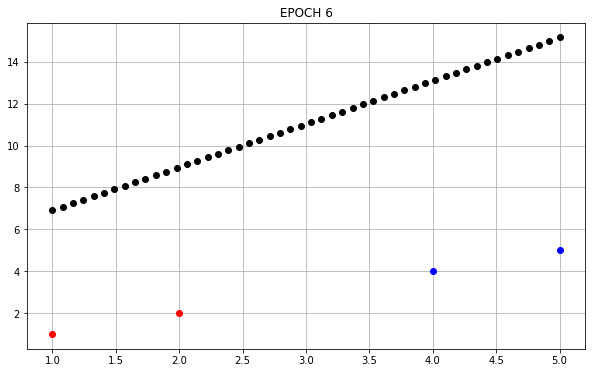

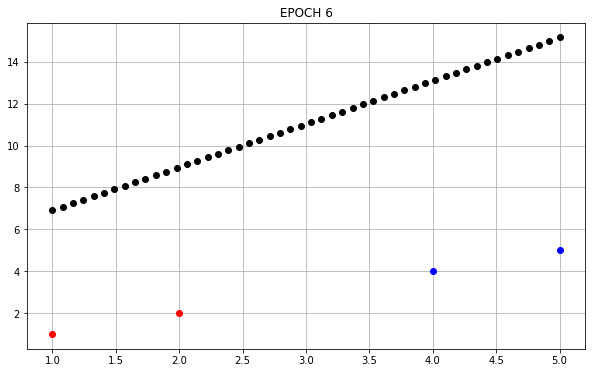

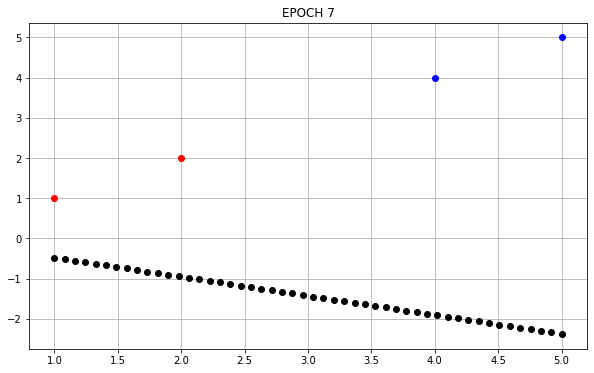

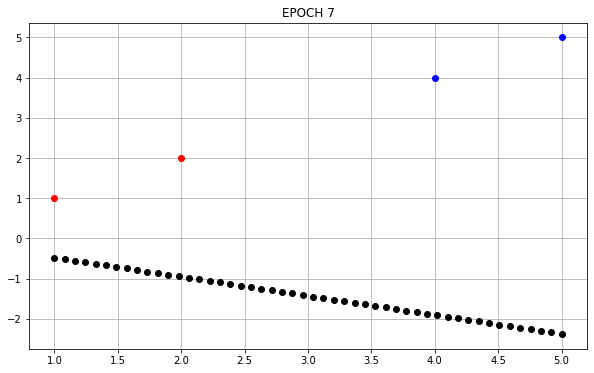

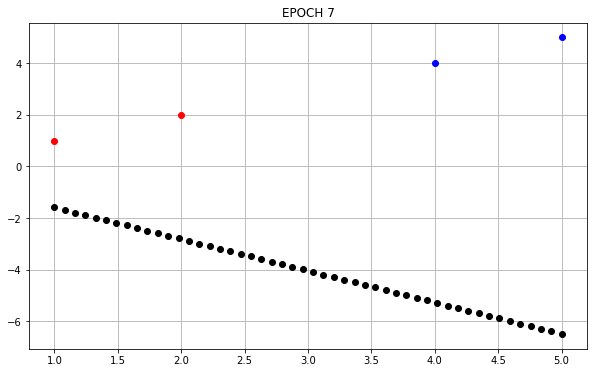

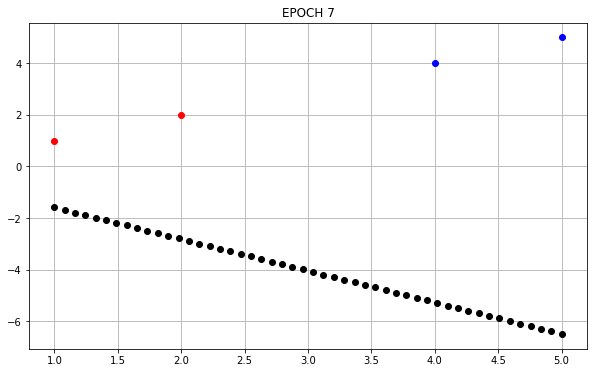

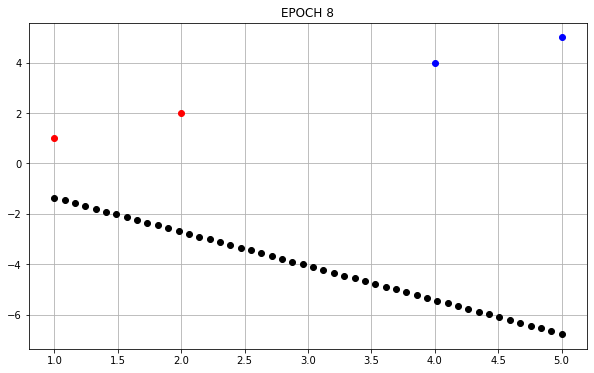

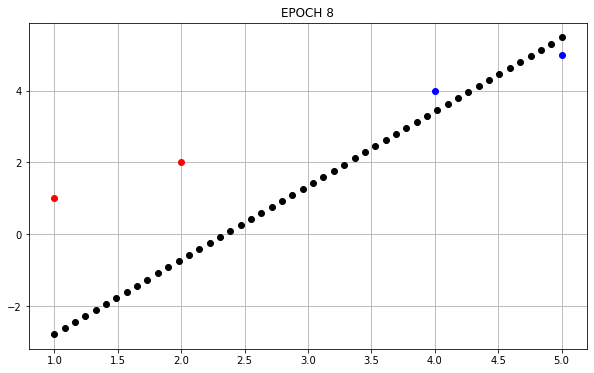

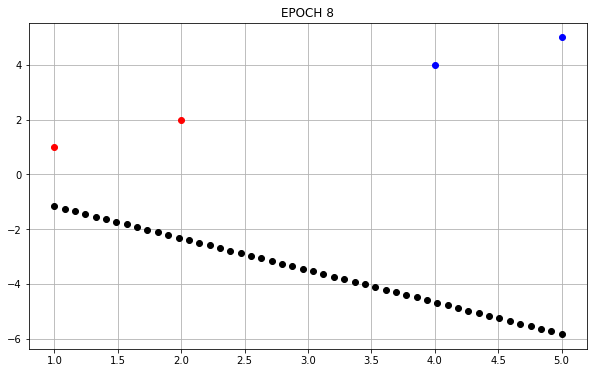

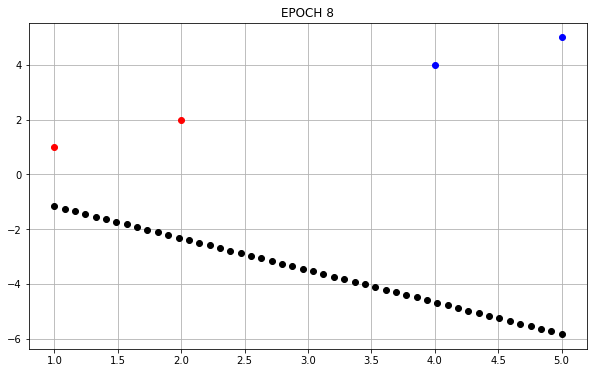

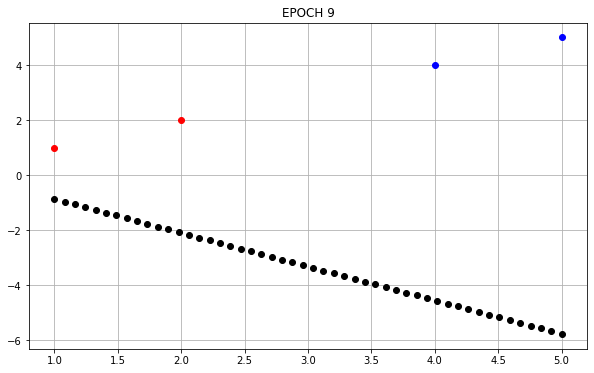

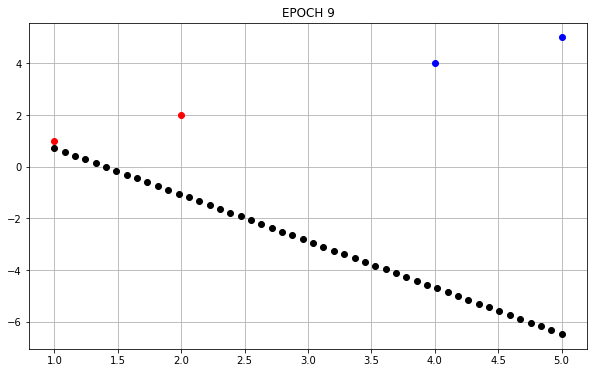

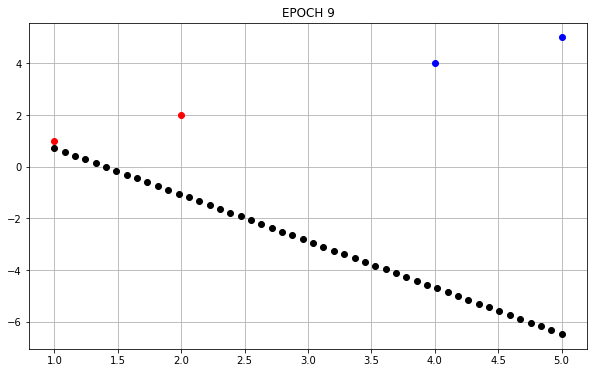

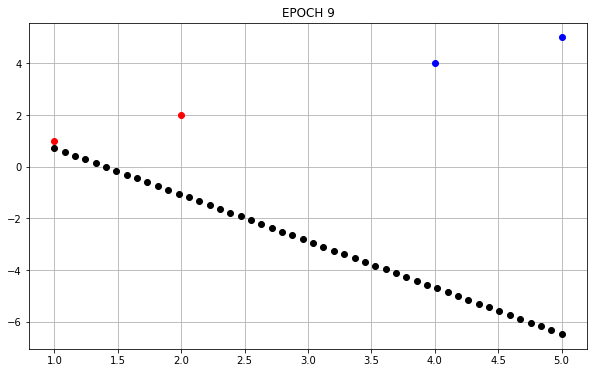

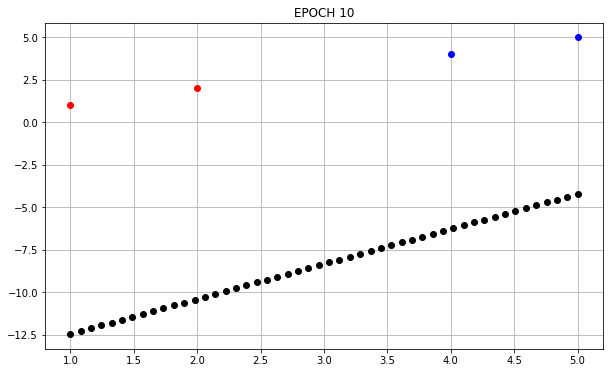

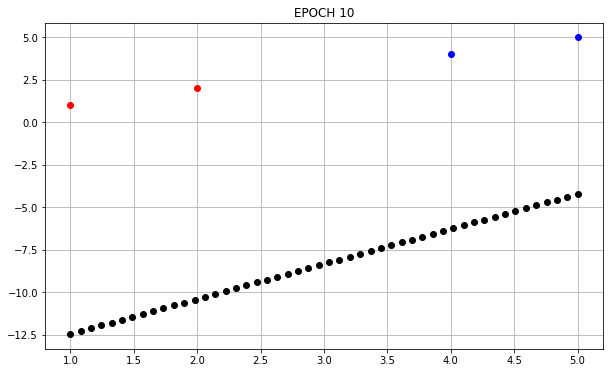

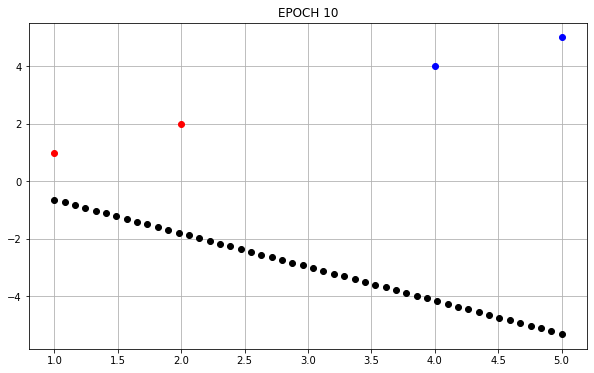

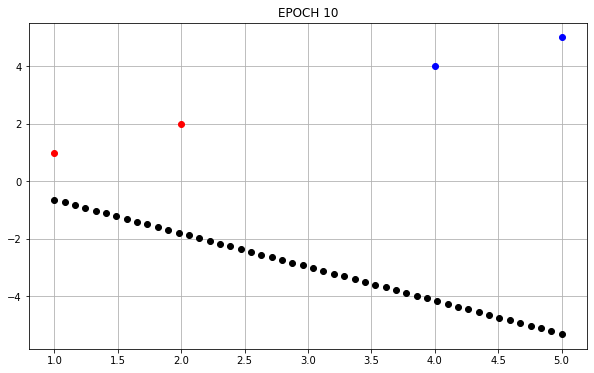

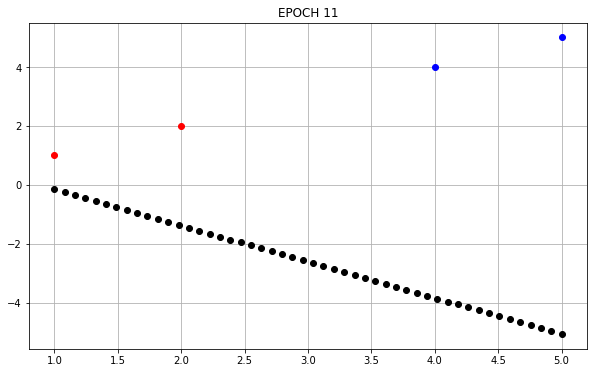

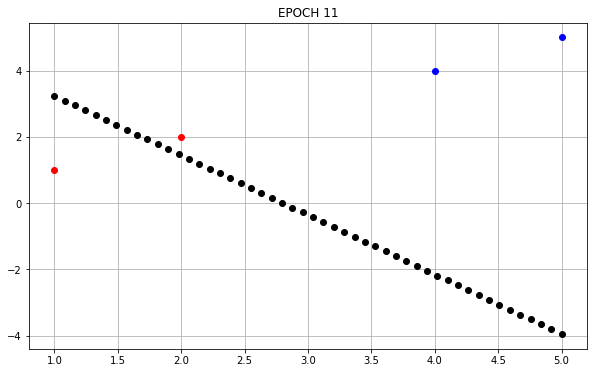

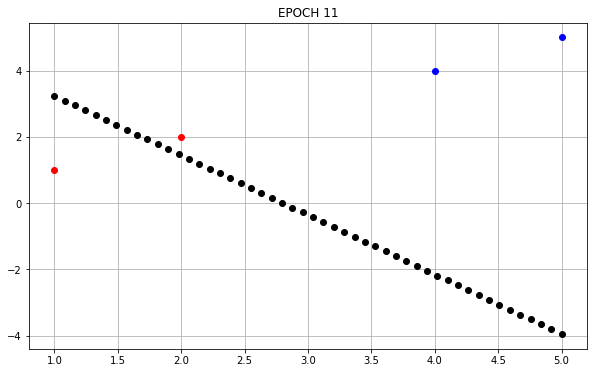

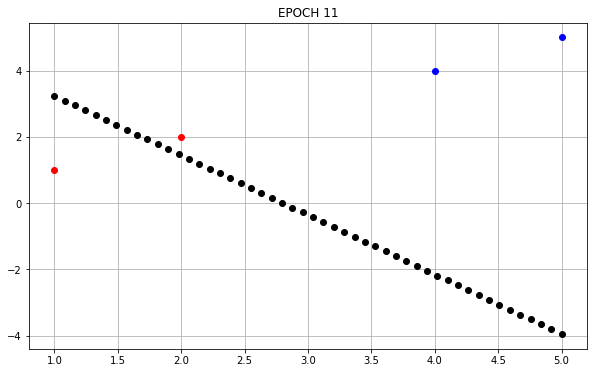

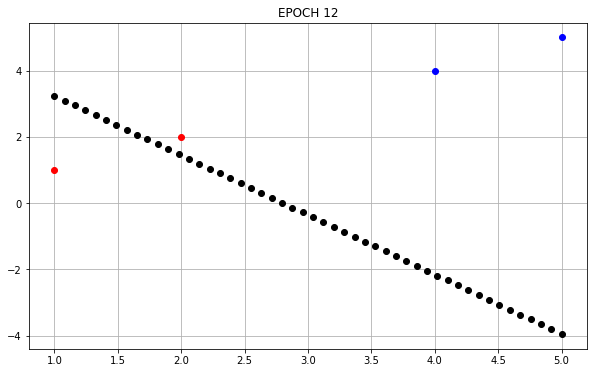

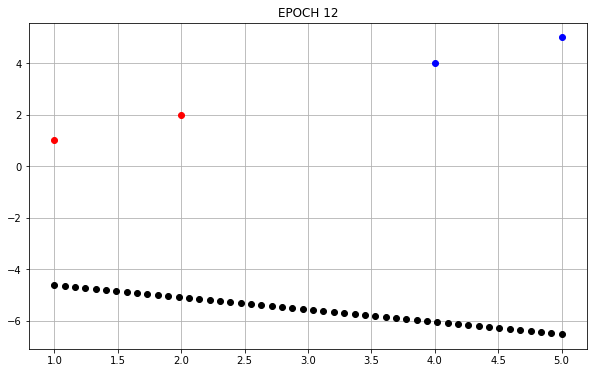

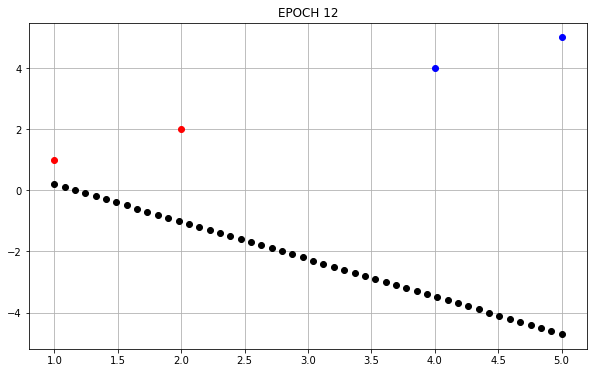

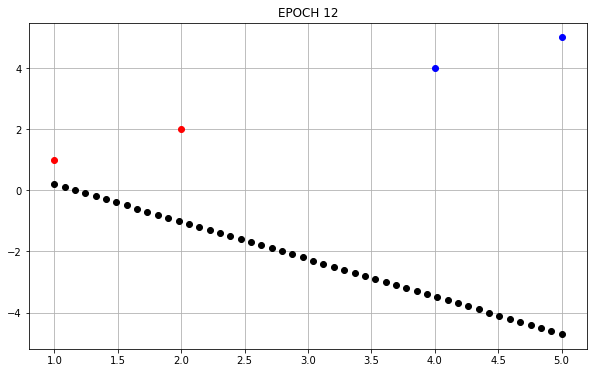

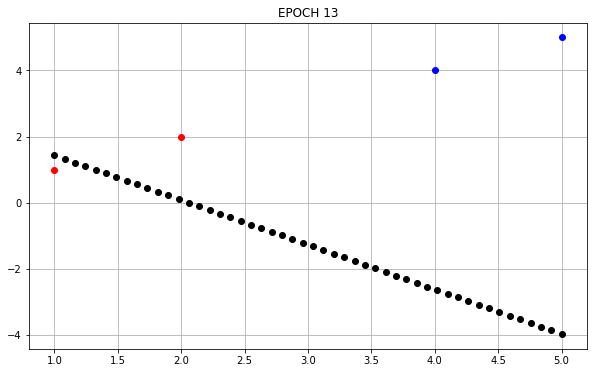

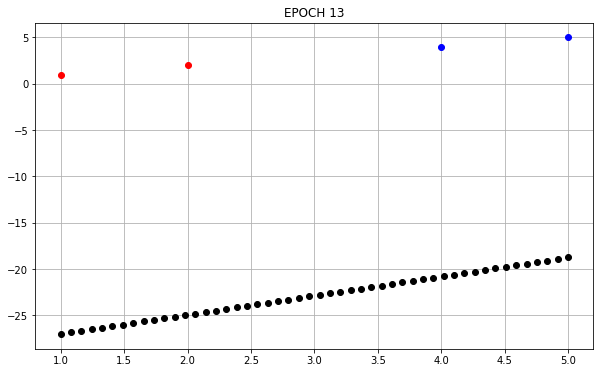

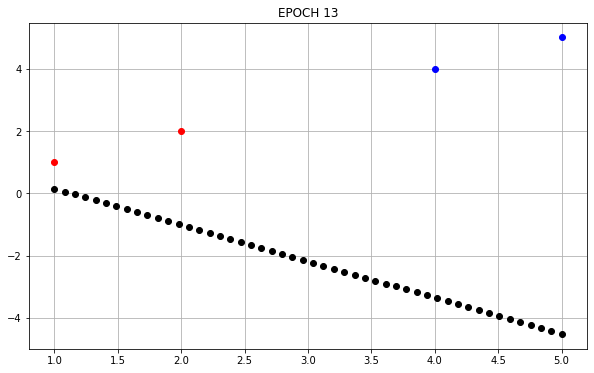

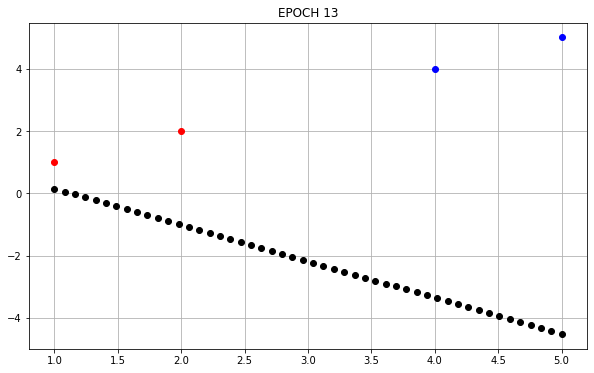

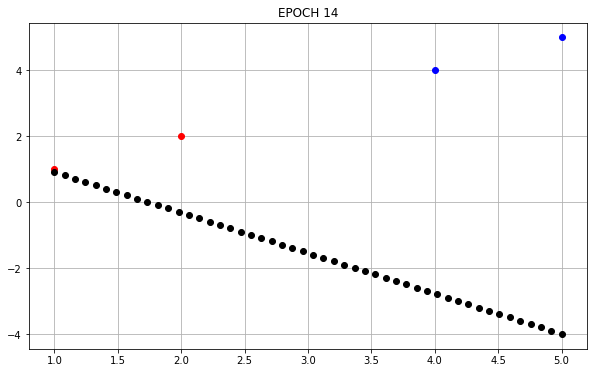

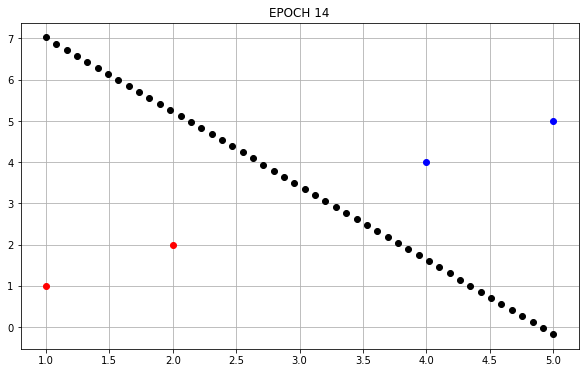

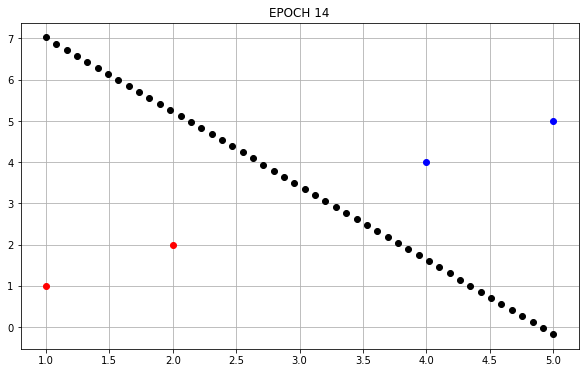

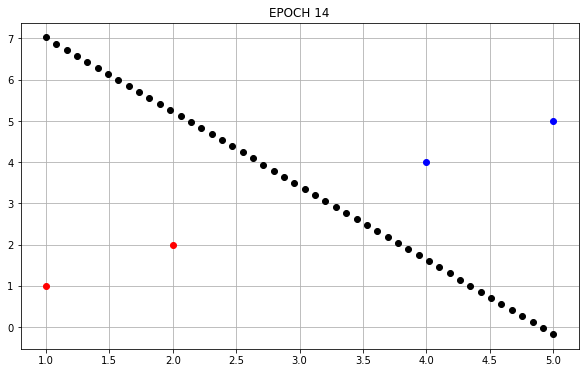

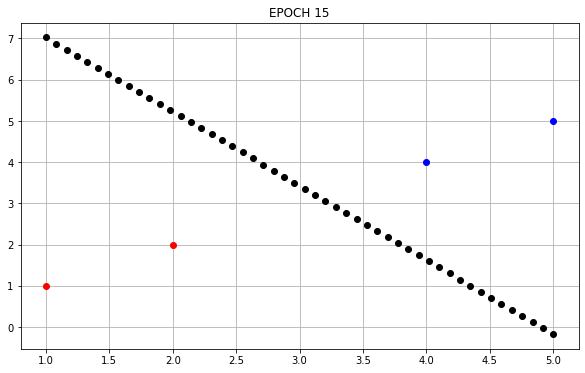

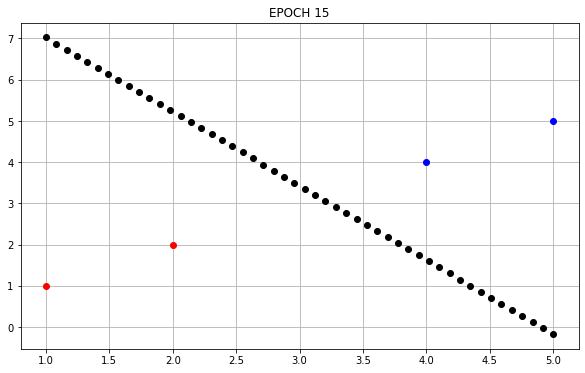

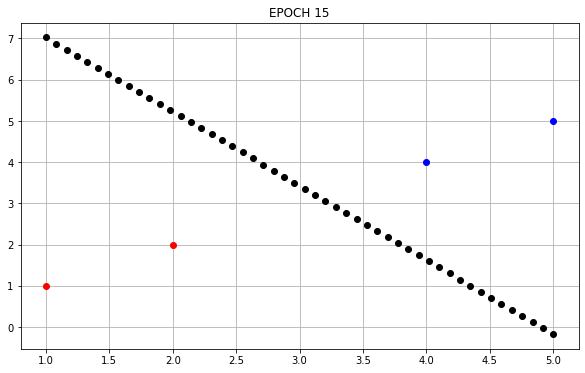

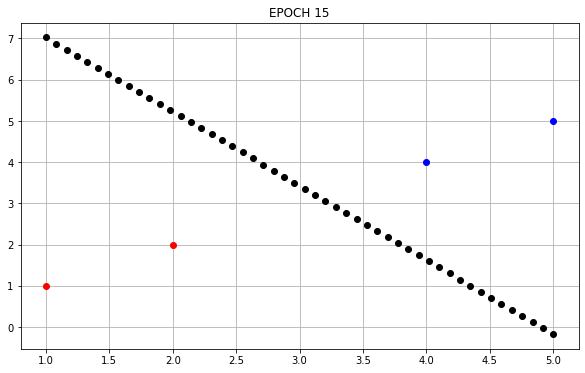

In [4]:
perp = Perceptron(X, Y)
perp.train()

In [5]:
# Test
for i in range(len(X)):
    print(perp.predict(X[i]))

calcNetSum:  -0.47802786132552055
0.0
calcNetSum:  -0.25605572265104126
0.0
calcNetSum:  0.18788855469791732
1.0
calcNetSum:  0.4098606933723966
1.0


Regression: 0.14(X1) + 0.08(X2) + -0.70
Slope:  -1.7972401439926977 Y-Intercept:  8.82123365791588


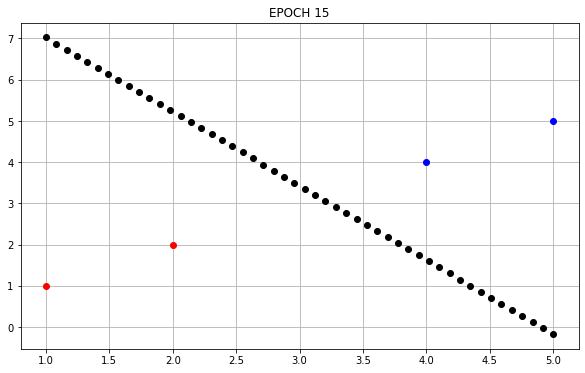

In [6]:
perp.plot_data()

Text(0, 0.5, 'cost')

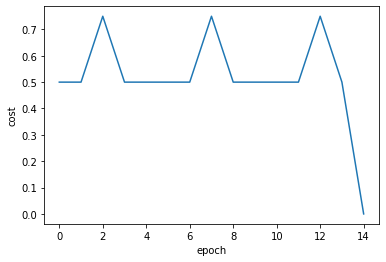

In [7]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [8]:
# OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])

..........
Initial Weights:  [0.42555758 0.94338574]
Initial Bias:  1.0
calcNetSum:  1.0
Regression: 0.43(X1) + 0.94(X2) + 0.90
Slope:  -0.4510960492678734 Y-Intercept:  -0.9540106066841075
	Epoch: 0001-01	y_hat: 1.0 	y: 00			Regression: 0.43(X1) + 0.94(X2) + 0.90
calcNetSum:  1.843385737741602
Regression: 0.43(X1) + 0.94(X2) + 0.90
Slope:  -0.4510960492678734 Y-Intercept:  -0.9540106066841075
	Epoch: 0001-02	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.90
calcNetSum:  1.3255575792308947
Regression: 0.43(X1) + 0.94(X2) + 0.90
Slope:  -0.4510960492678734 Y-Intercept:  -0.9540106066841075
	Epoch: 0001-03	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.90
calcNetSum:  2.268943316972497
Regression: 0.43(X1) + 0.94(X2) + 0.90
Slope:  -0.4510960492678734 Y-Intercept:  -0.9540106066841075
	Epoch: 0001-04	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.90
Epoch: 0001	Misclassifed: 01 	Loss: 0.25000		Regression: 0.43(X1) + 0.94(X2) + 0.90	Prediced:  [1.0, 1.0, 1.0, 1.

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 -0.4510960492678734 Y-Intercept:  -0.4240047140818257
	Epoch: 0006-01	y_hat: 1.0 	y: 00			Regression: 0.43(X1) + 0.94(X2) + 0.40
calcNetSum:  1.343385737741602
Regression: 0.43(X1) + 0.94(X2) + 0.40
Slope:  -0.4510960492678734 Y-Intercept:  -0.4240047140818257
	Epoch: 0006-02	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.40
calcNetSum:  0.8255575792308949
Regression: 0.43(X1) + 0.94(X2) + 0.40
Slope:  -0.4510960492678734 Y-Intercept:  -0.4240047140818257
	Epoch: 0006-03	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.40
calcNetSum:  1.7689433169724968
Regression: 0.43(X1) + 0.94(X2) + 0.40
Slope:  -0.4510960492678734 Y-Intercept:  -0.4240047140818257
	Epoch: 0006-04	y_hat: 1.0 	y: 01			Regression: 0.43(X1) + 0.94(X2) + 0.40
Epoch: 0006	Misclassifed: 01 	Loss: 0.25000		Regression: 0.43(X1) + 0.94(X2) + 0.40	Prediced:  [1.0, 1.0, 1.0, 1.0]
calcNetSum:  0.40000000000000013
Regression: 0.43(X1) + 0.94(X2) + 0.30
Slope:  -0.4510960492678734 Y-Intercept:  -0.31800353556136

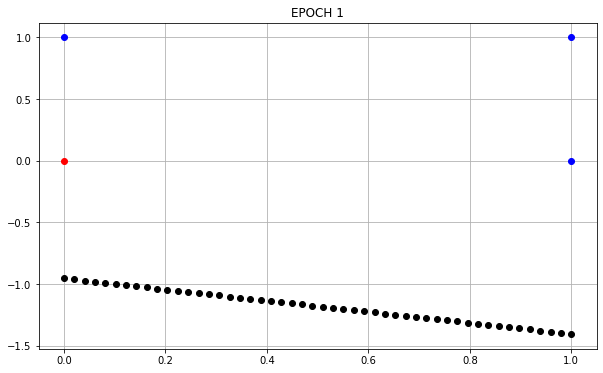

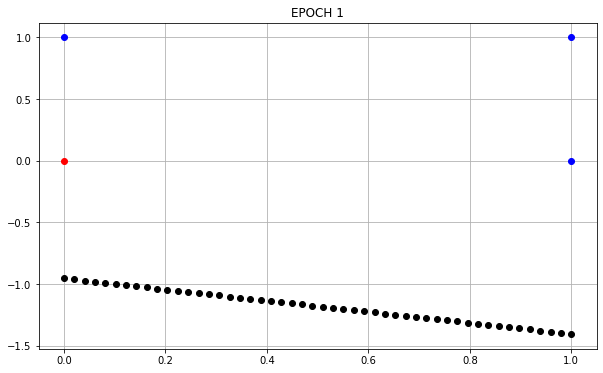

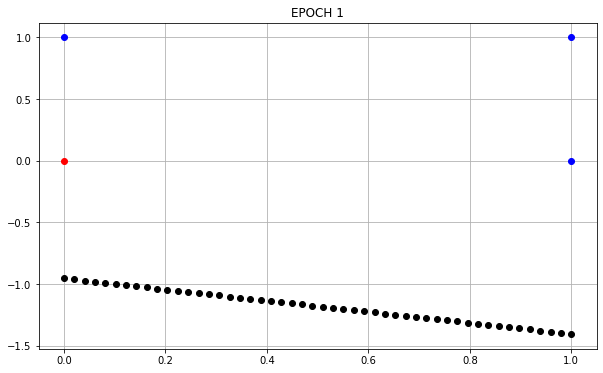

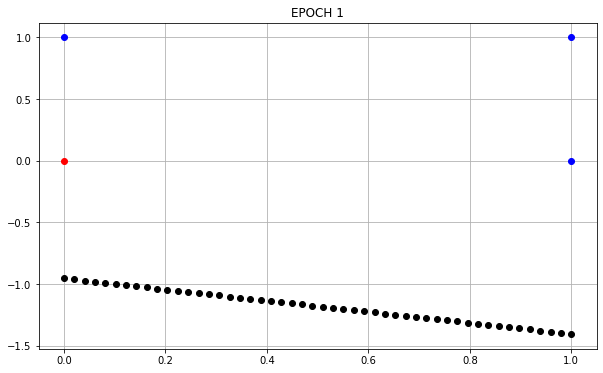

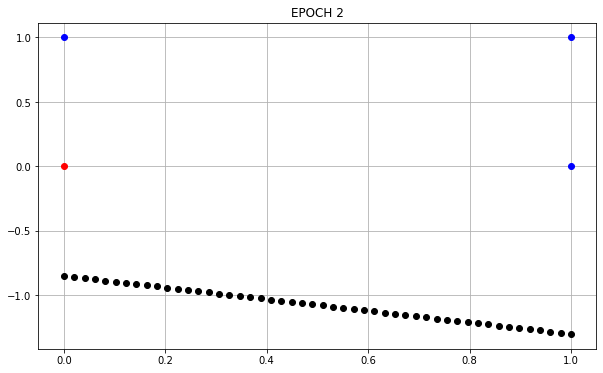

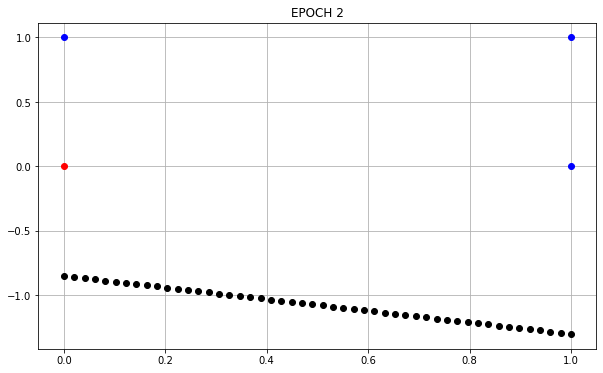

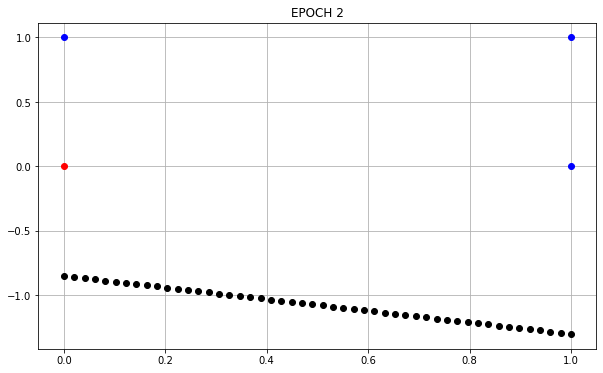

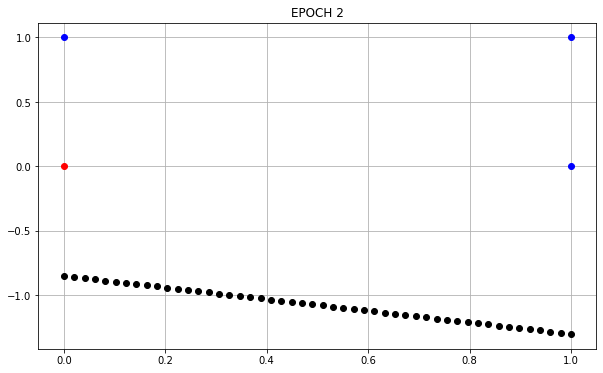

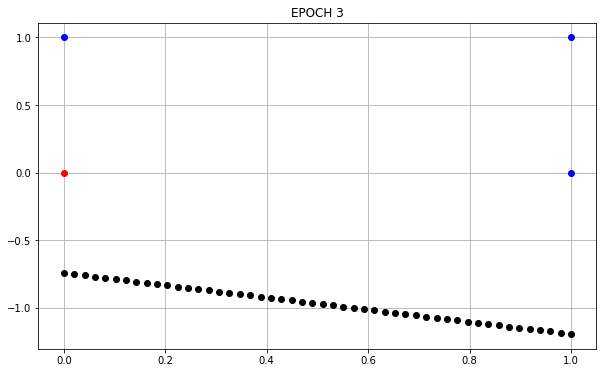

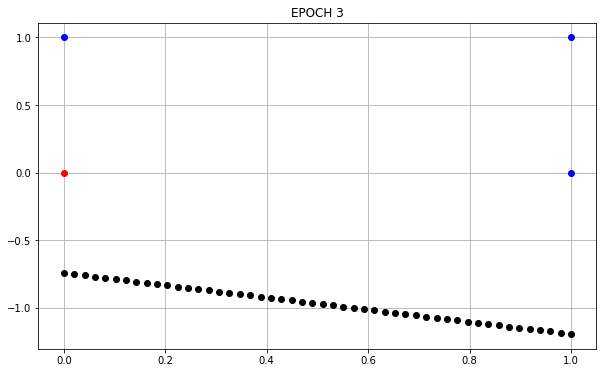

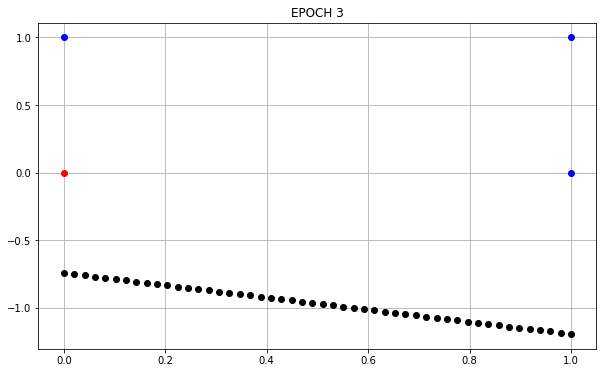

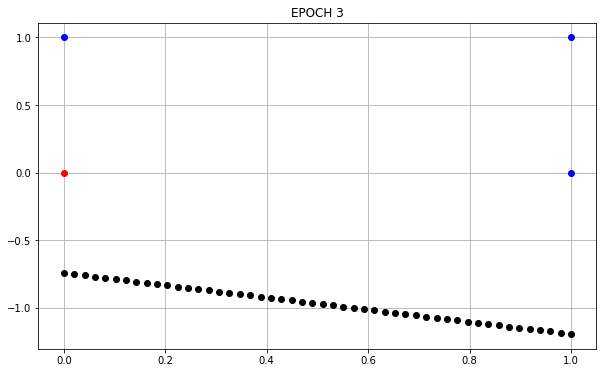

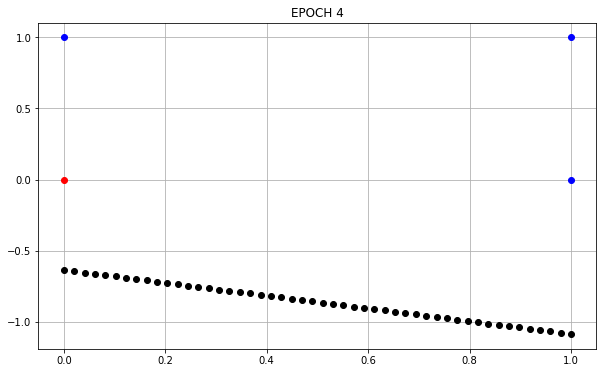

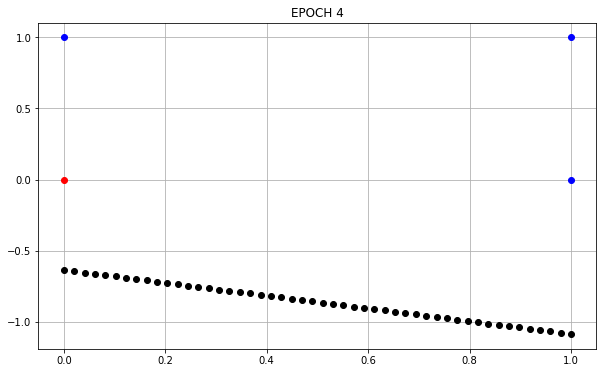

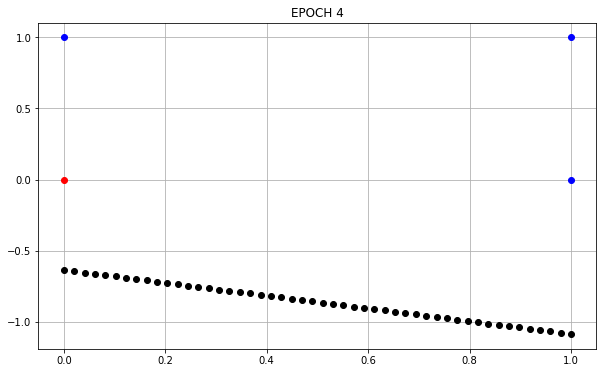

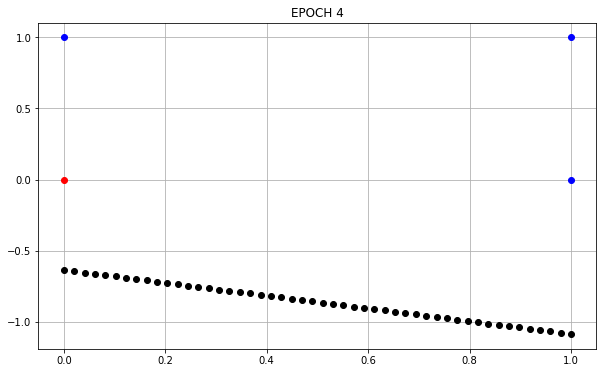

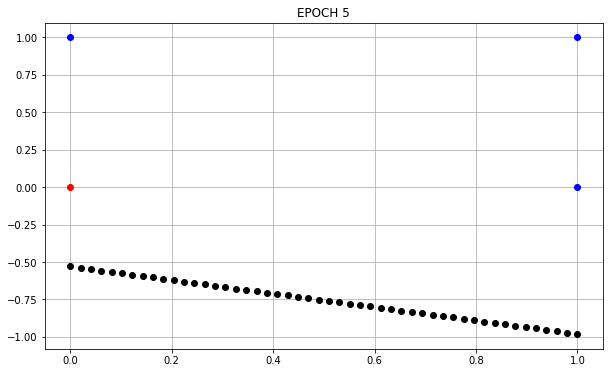

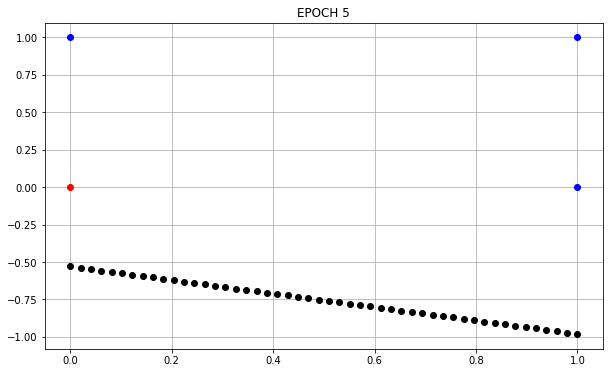

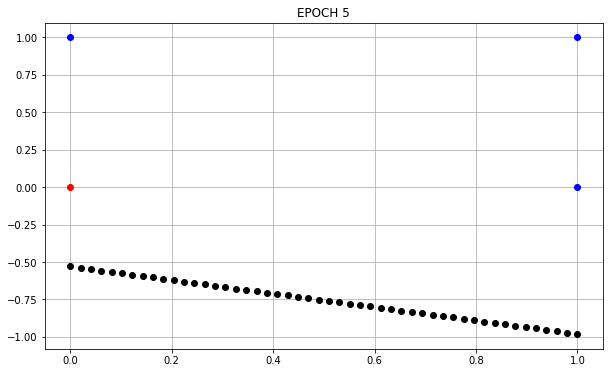

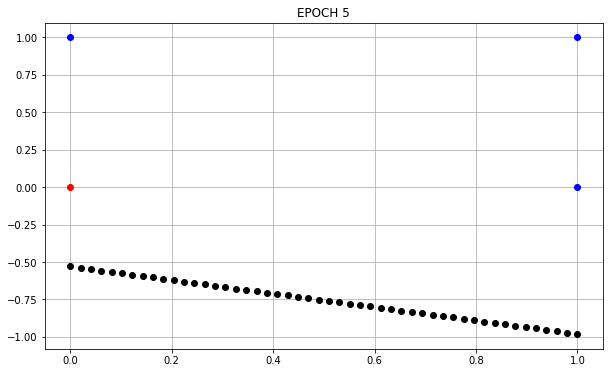

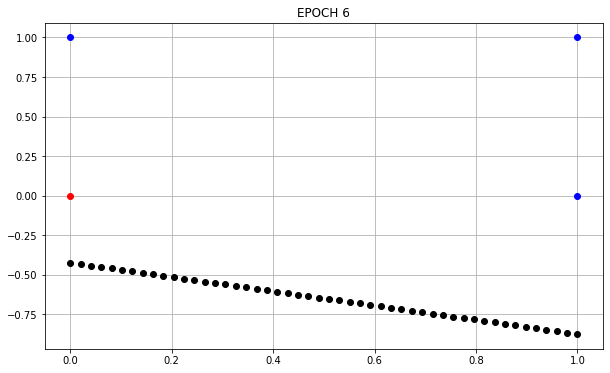

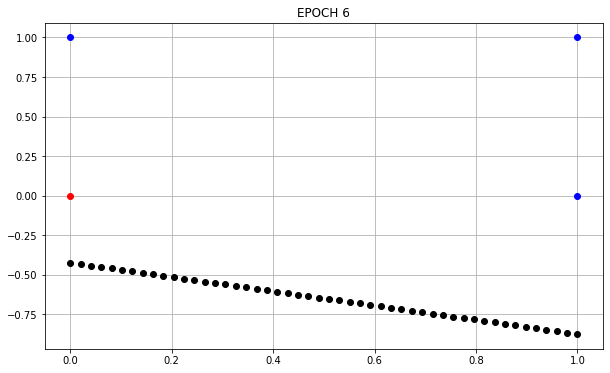

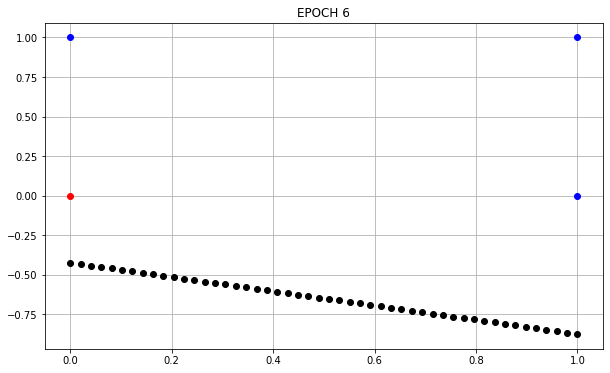

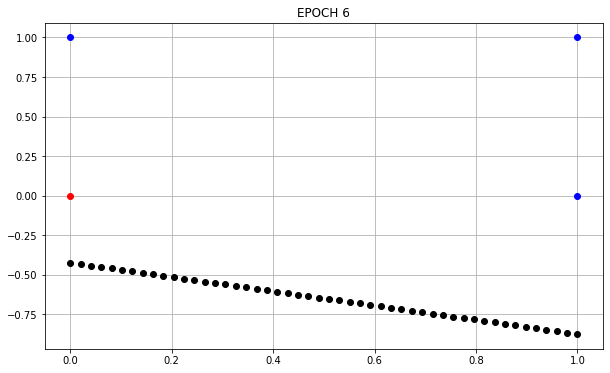

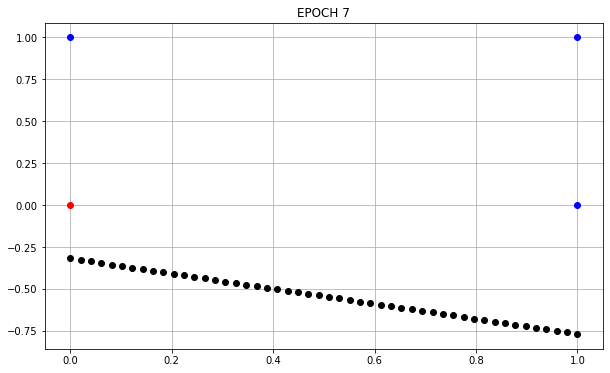

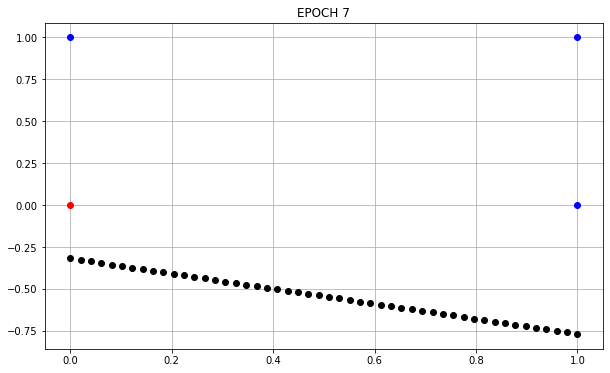

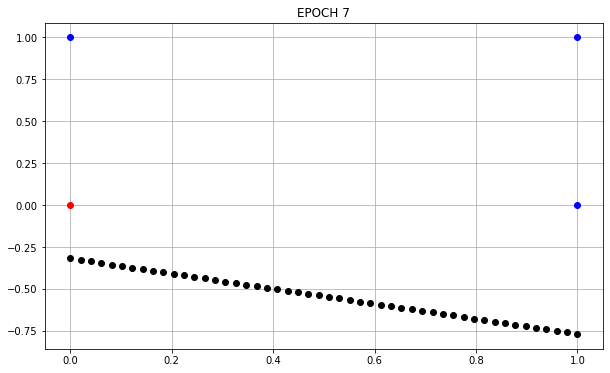

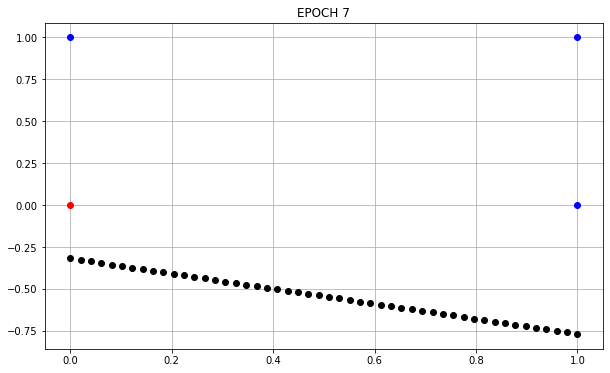

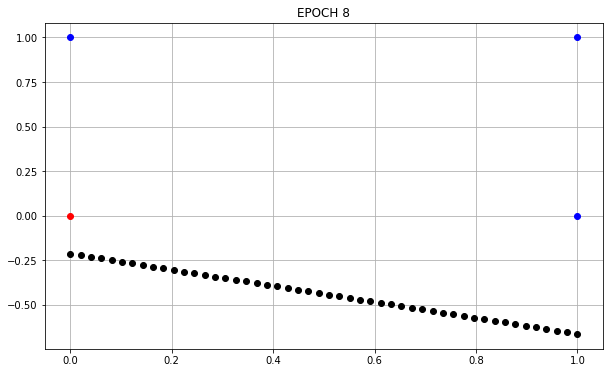

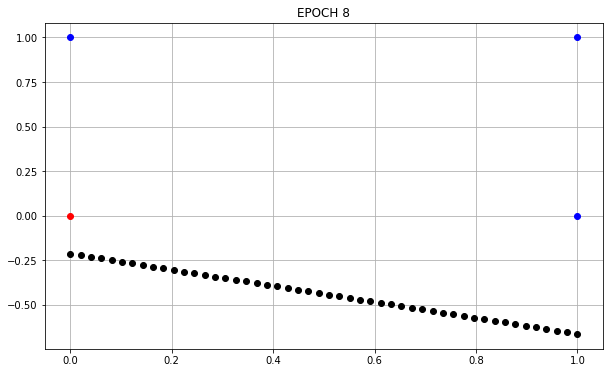

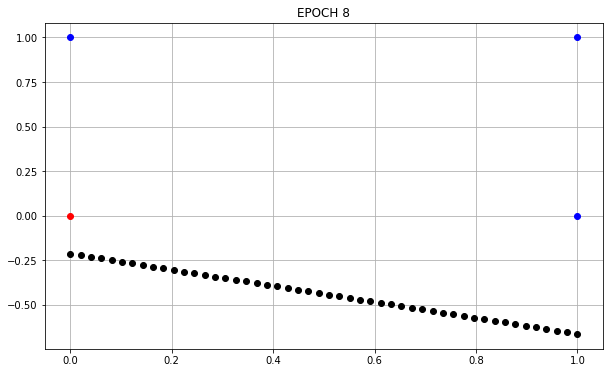

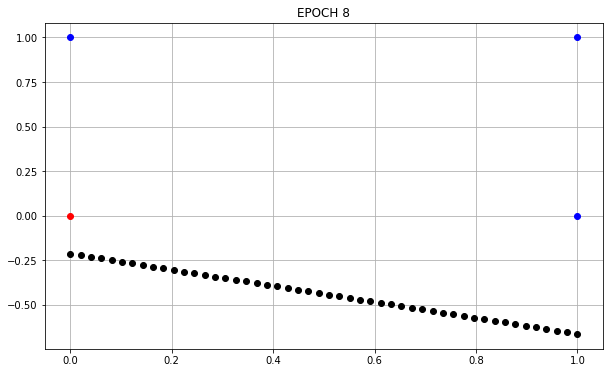

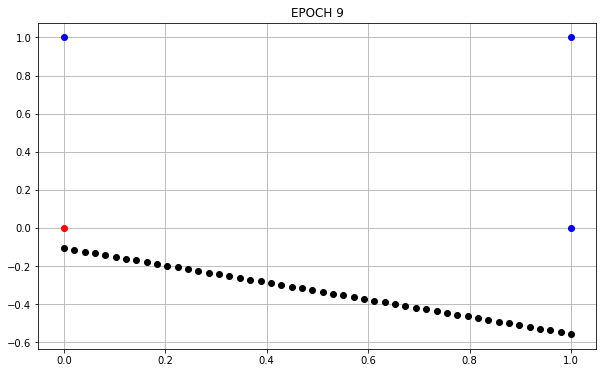

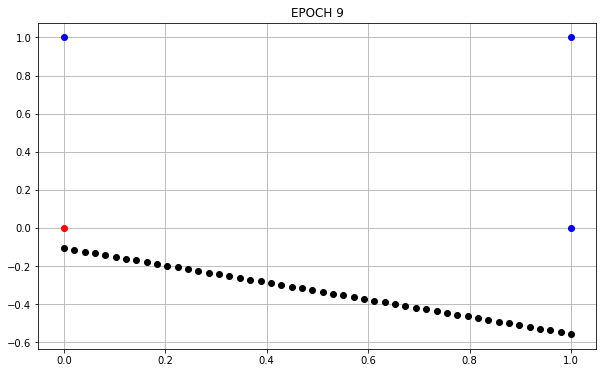

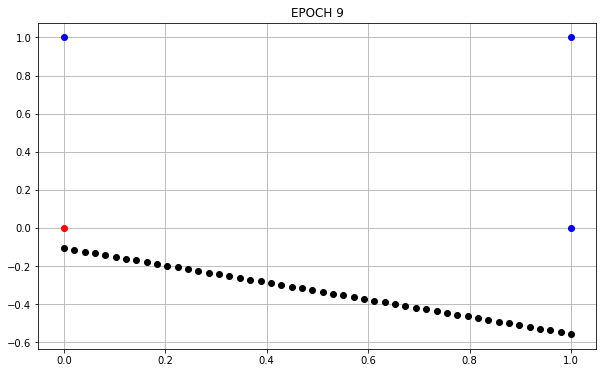

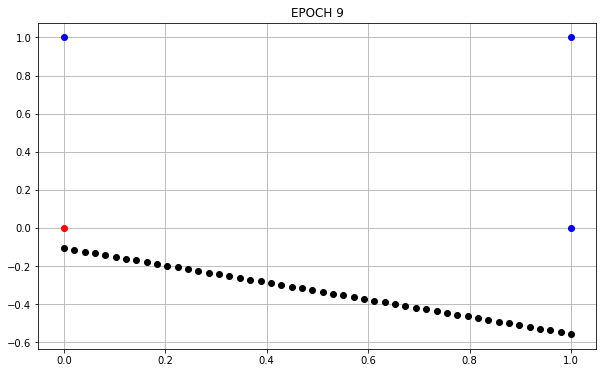

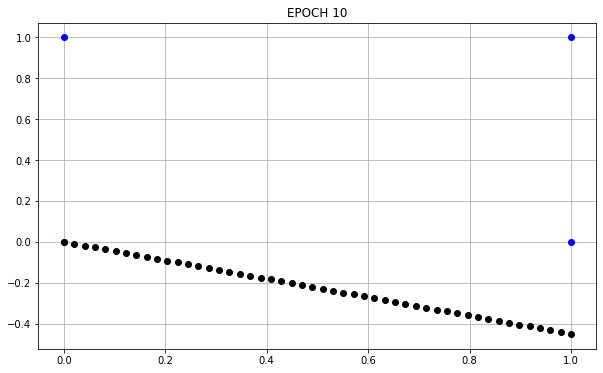

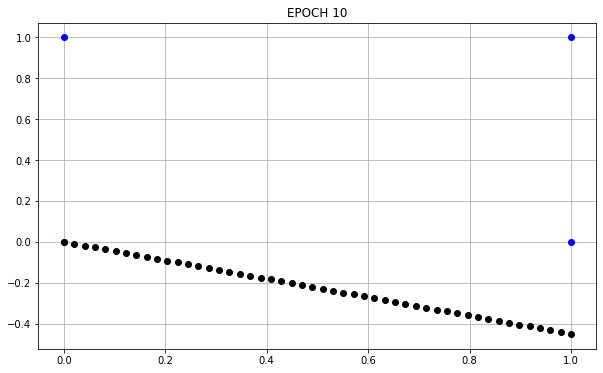

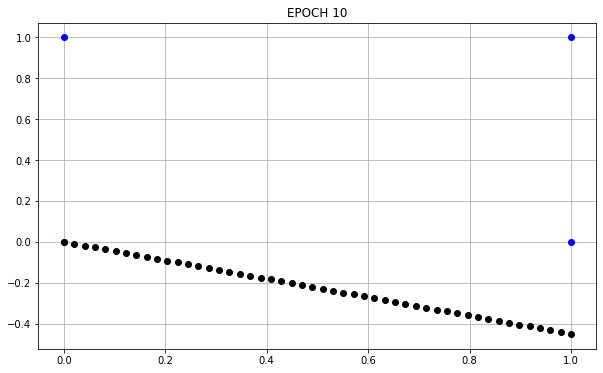

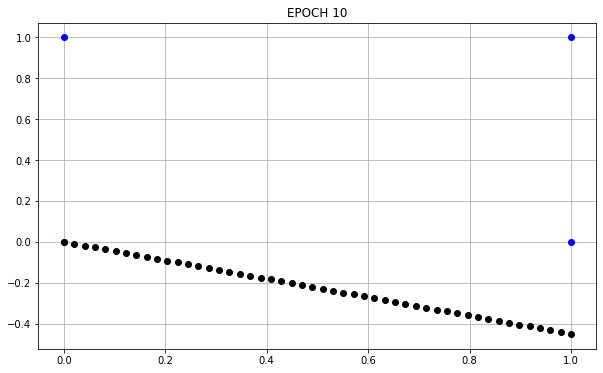

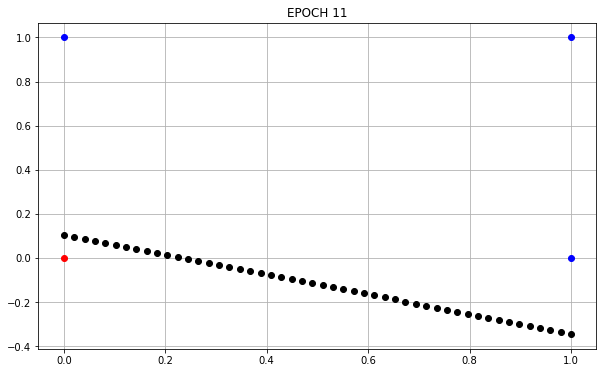

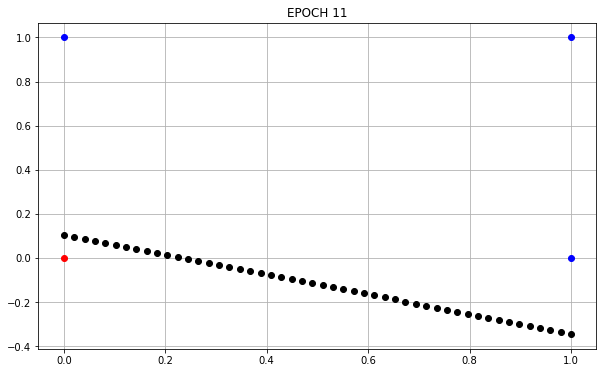

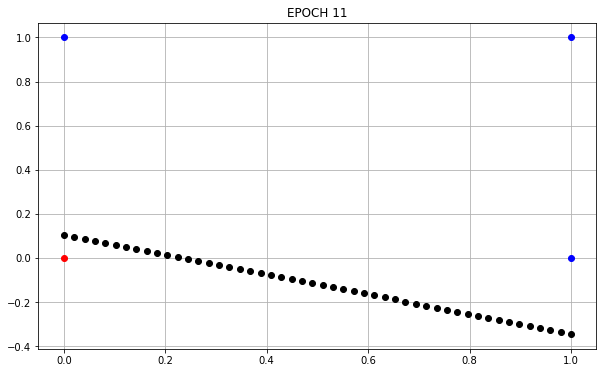

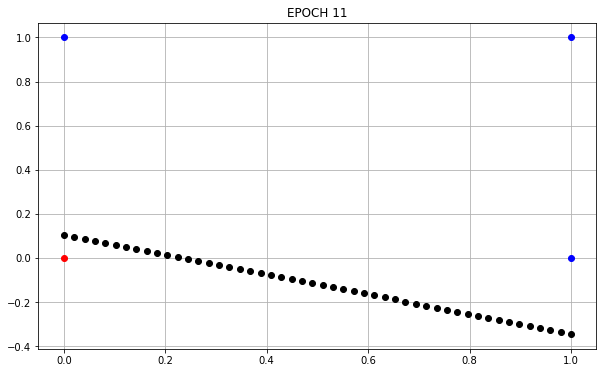

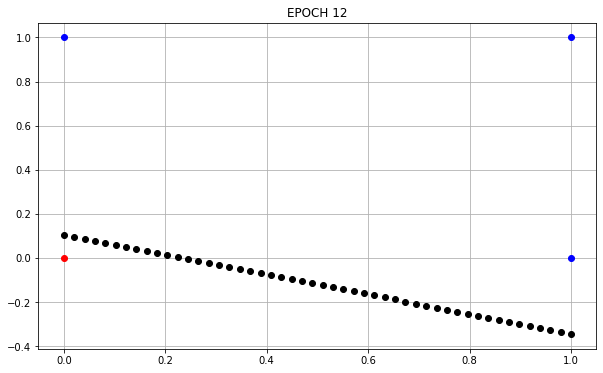

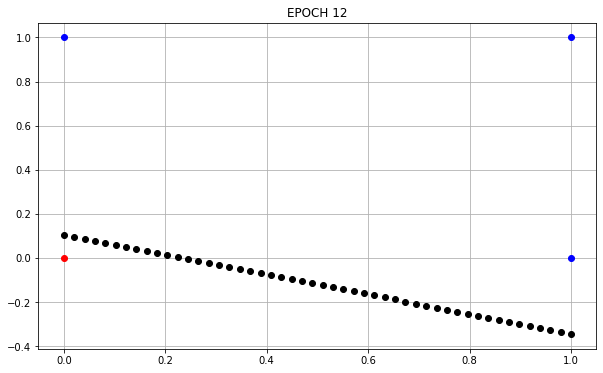

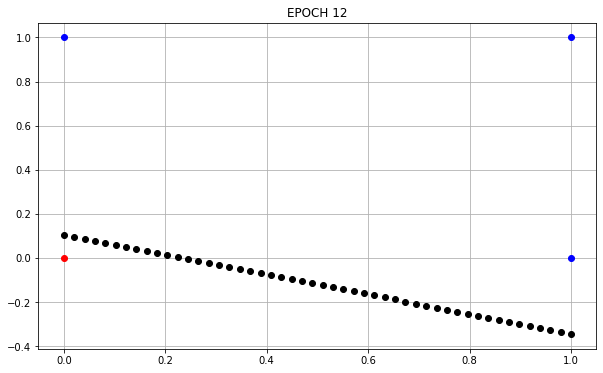

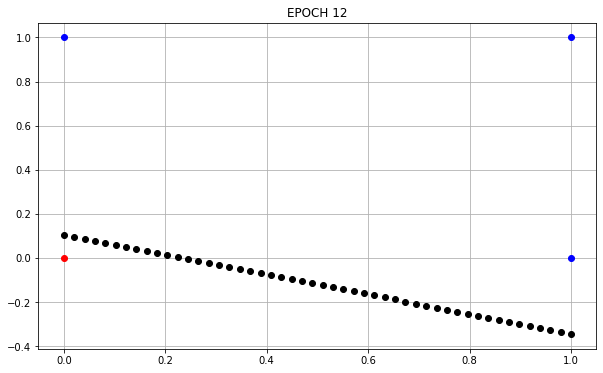

In [9]:
perp = Perceptron(X, Y)
perp.train()

In [10]:
# Test
for i in range(len(X)):
    print(perp.predict(X[i]))

calcNetSum:  -0.09999999999999987
0.0
calcNetSum:  0.8433857377416021
1.0
calcNetSum:  0.3255575792308949
1.0
calcNetSum:  1.2689433169724968
1.0


Regression: 0.43(X1) + 0.94(X2) + -0.10
Slope:  -0.4510960492678734 Y-Intercept:  0.10600117852045625


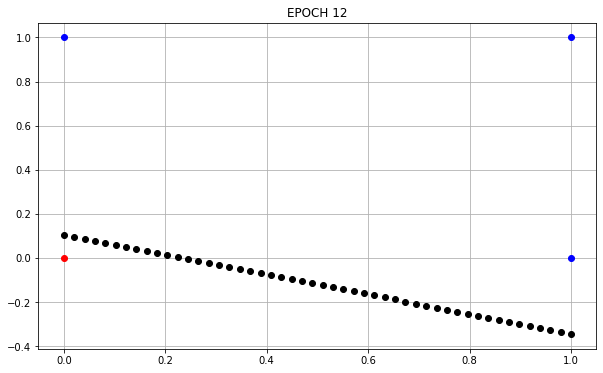

In [11]:
perp.plot_data()

Text(0, 0.5, 'cost')

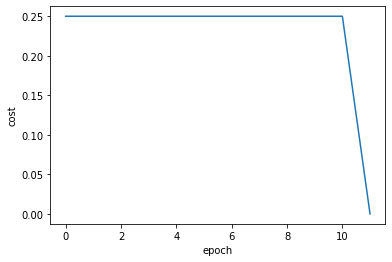

In [12]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [13]:
# AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

..........
Initial Weights:  [0.40846713 0.46895711]
Initial Bias:  1.0
calcNetSum:  1.0
Regression: 0.41(X1) + 0.47(X2) + 0.90
Slope:  -0.871011689803469 Y-Intercept:  -1.9191520490932554
	Epoch: 0001-01	y_hat: 1.0 	y: 00			Regression: 0.41(X1) + 0.47(X2) + 0.90
calcNetSum:  1.3689571107329535
Regression: 0.41(X1) + 0.37(X2) + 0.80
Slope:  -1.1070856573367567 Y-Intercept:  -2.168273701002148
	Epoch: 0001-02	y_hat: 1.0 	y: 00			Regression: 0.41(X1) + 0.37(X2) + 0.80
calcNetSum:  1.2084671254648622
Regression: 0.31(X1) + 0.37(X2) + 0.70
Slope:  -0.8360514447114883 Y-Intercept:  -1.8972394883768795
	Epoch: 0001-03	y_hat: 1.0 	y: 00			Regression: 0.31(X1) + 0.37(X2) + 0.70
calcNetSum:  1.3774242361978155
Regression: 0.31(X1) + 0.37(X2) + 0.70
Slope:  -0.8360514447114883 Y-Intercept:  -1.8972394883768795
	Epoch: 0001-04	y_hat: 1.0 	y: 01			Regression: 0.31(X1) + 0.37(X2) + 0.70
Epoch: 0001	Misclassifed: 03 	Loss: 0.75000		Regression: 0.31(X1) + 0.37(X2) + 0.70	Prediced:  [1.0, 1.0, 1.0, 1.

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Slope:  -3.023141823215043 Y-Intercept:  2.9003535367734528
	Epoch: 0006-02	y_hat: 1.0 	y: 00			Regression: 0.21(X1) + 0.07(X2) + -0.20
calcNetSum:  0.008467125464862335
Regression: 0.11(X1) + 0.07(X2) + -0.30
Slope:  -1.5729650548283156 Y-Intercept:  4.35053030516018
	Epoch: 0006-03	y_hat: 1.0 	y: 00			Regression: 0.11(X1) + 0.07(X2) + -0.30
calcNetSum:  -0.12257576380218432
Regression: 0.21(X1) + 0.17(X2) + -0.20
Slope:  -1.2338464155815068 Y-Intercept:  1.183732363393167
	Epoch: 0006-04	y_hat: 0.0 	y: 01			Regression: 0.21(X1) + 0.17(X2) + -0.20
Epoch: 0006	Misclassifed: 03 	Loss: 0.75000		Regression: 0.21(X1) + 0.17(X2) + -0.20	Prediced:  [0.0, 1.0, 1.0, 0.0]
calcNetSum:  -0.19999999999999987
Regression: 0.21(X1) + 0.17(X2) + -0.20
Slope:  -1.2338464155815068 Y-Intercept:  1.183732363393167
	Epoch: 0007-01	y_hat: 0.0 	y: 00			Regression: 0.21(X1) + 0.17(X2) + -0.20
calcNetSum:  -0.031042889267046514
Regression: 0.21(X1) + 0.17(X2) + -0.20
Slope:  -1.2338464155815068 Y-Intercept:  1

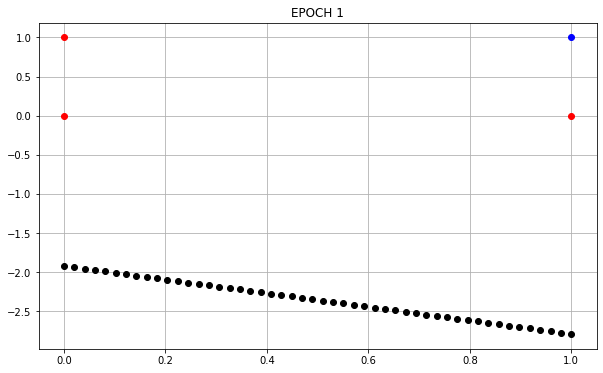

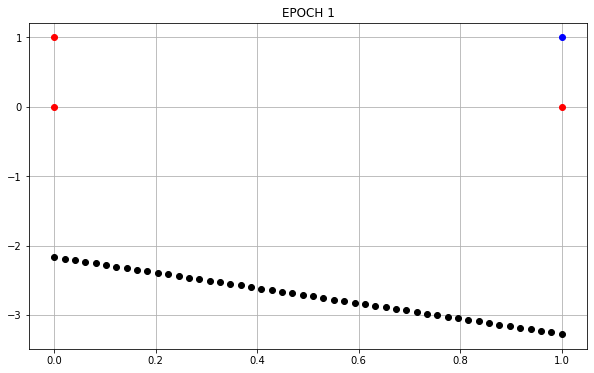

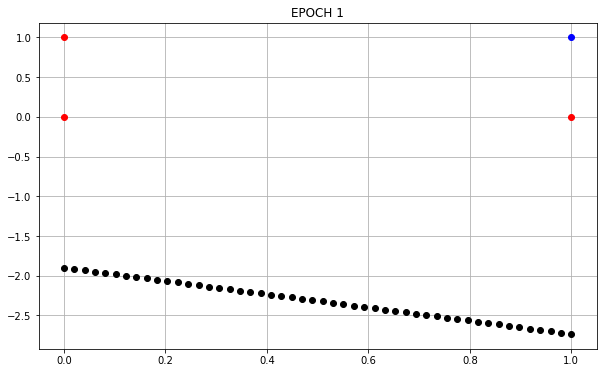

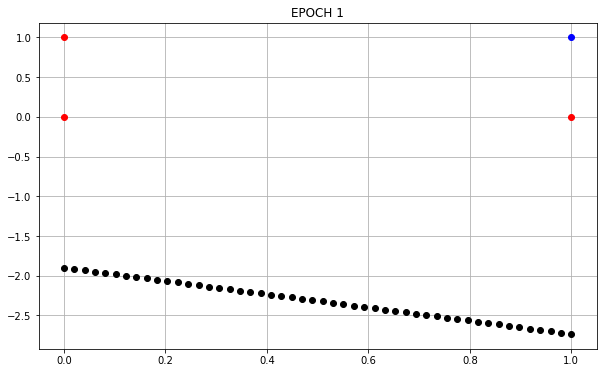

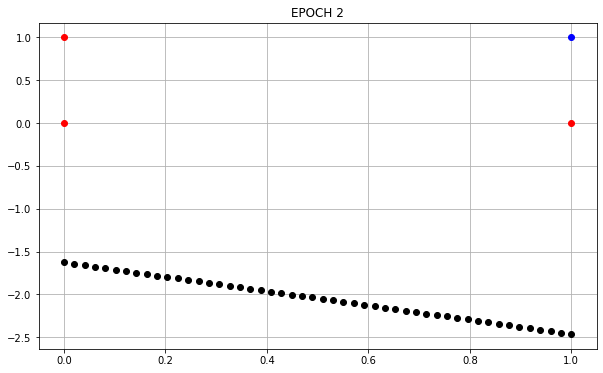

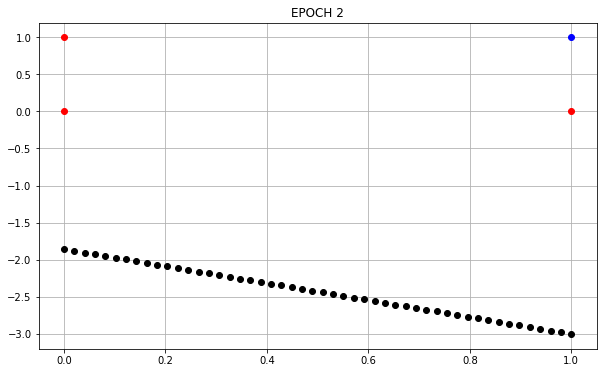

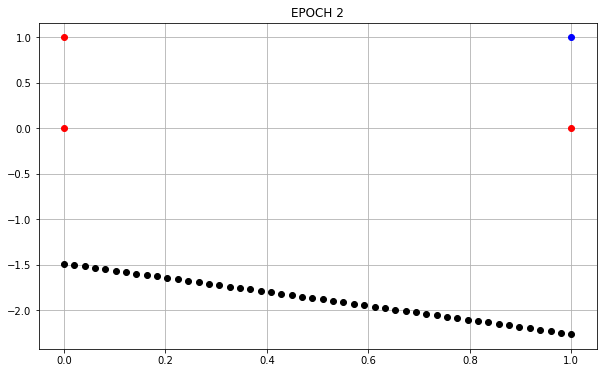

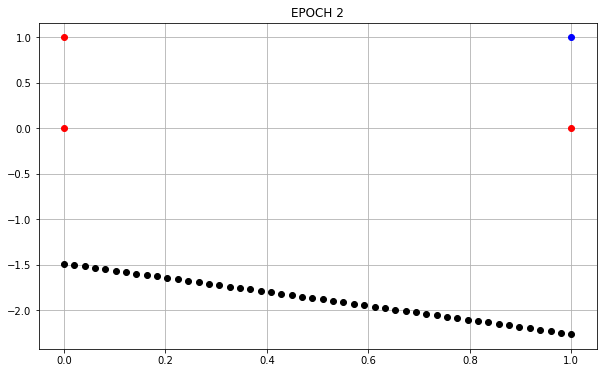

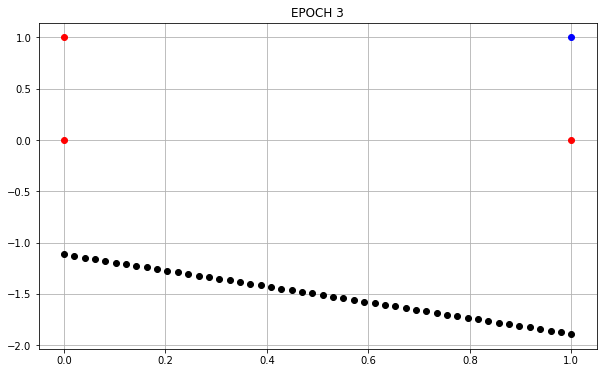

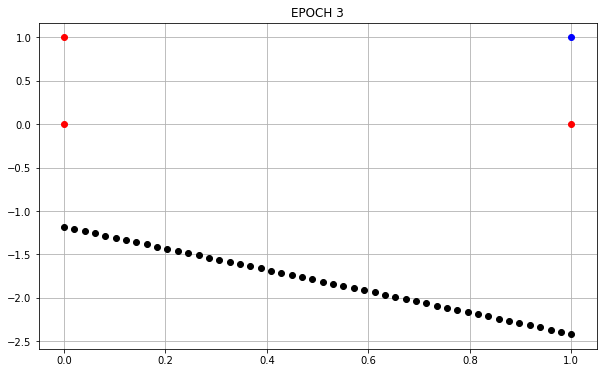

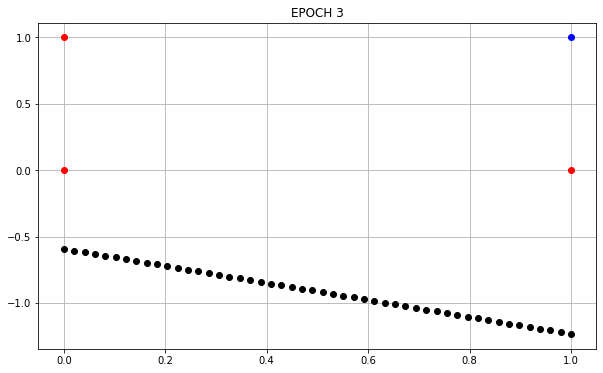

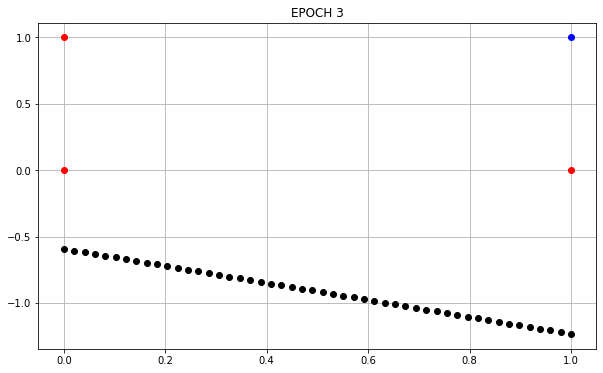

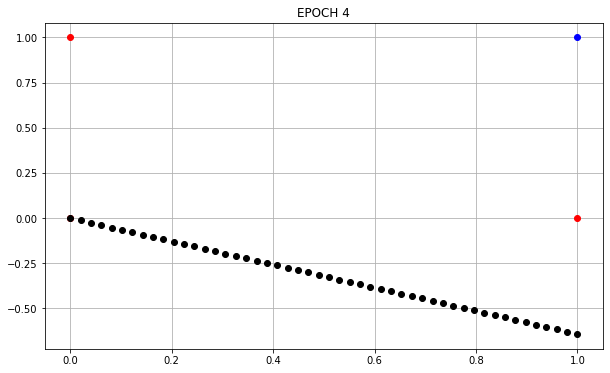

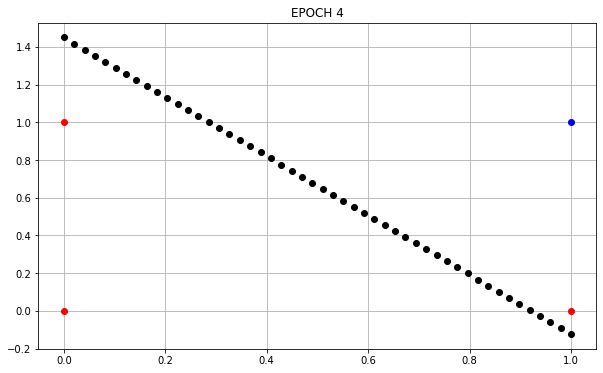

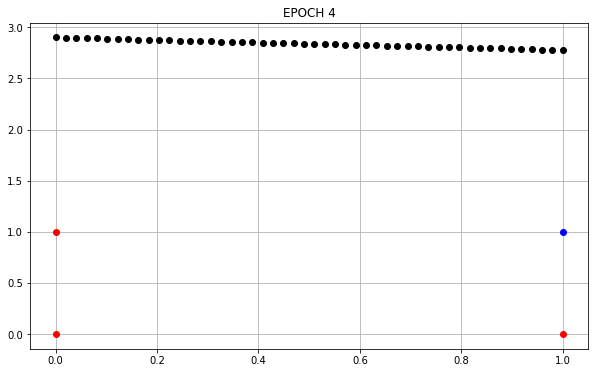

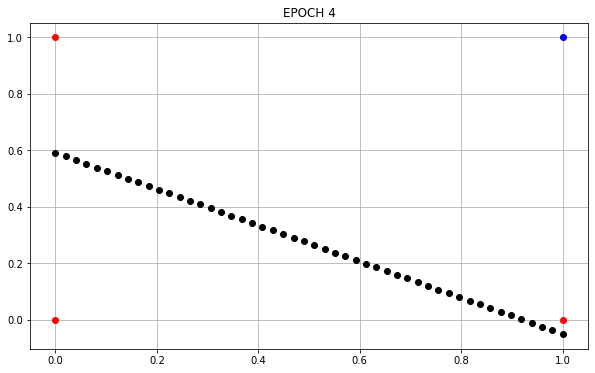

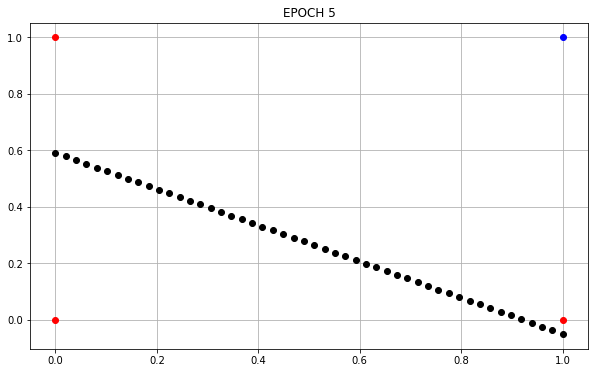

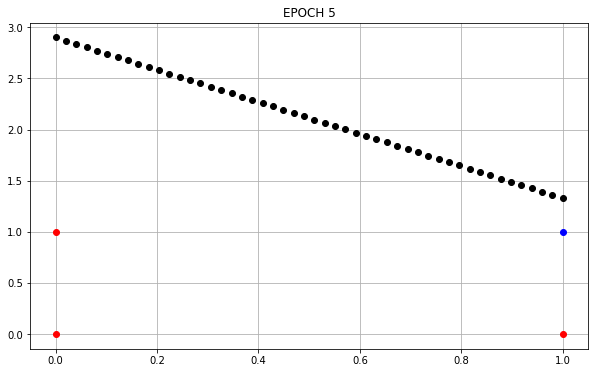

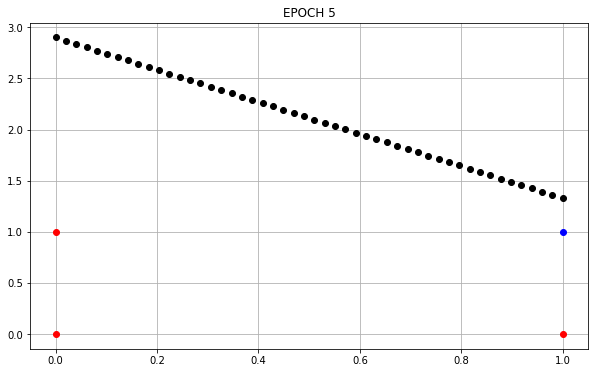

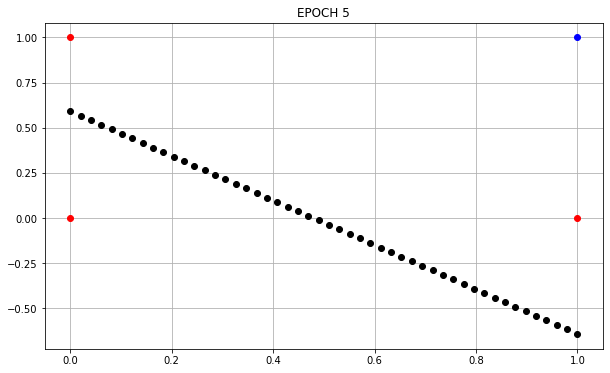

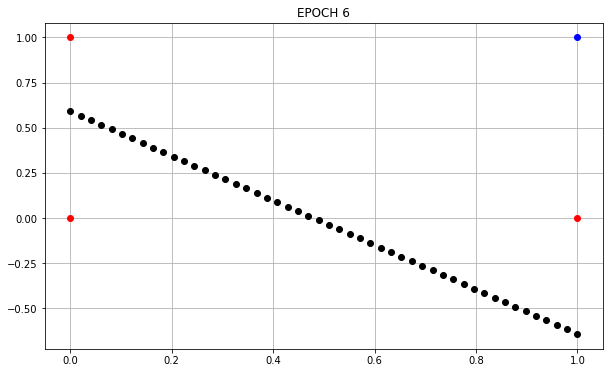

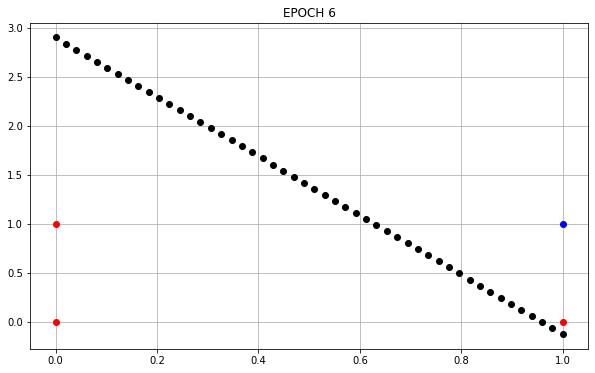

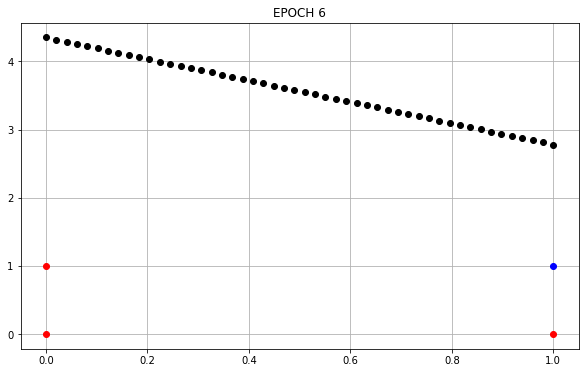

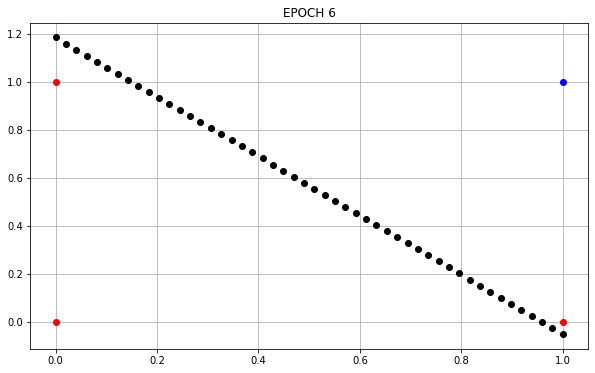

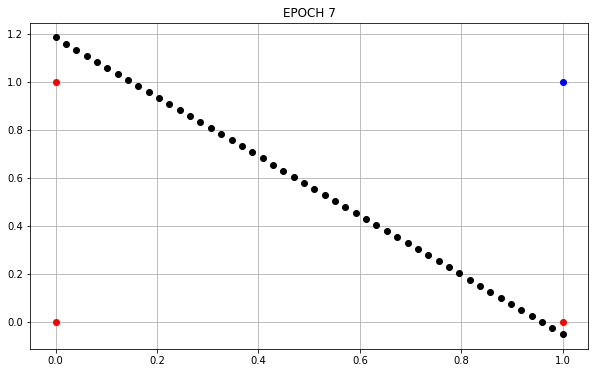

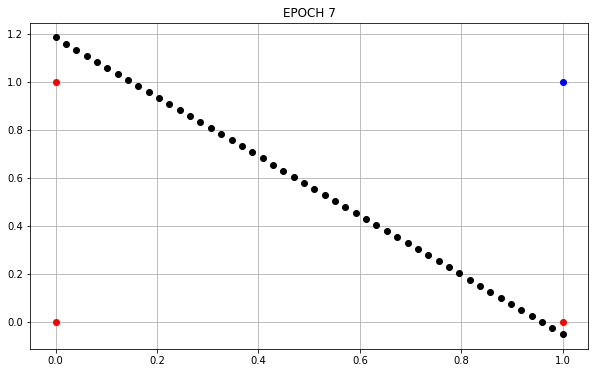

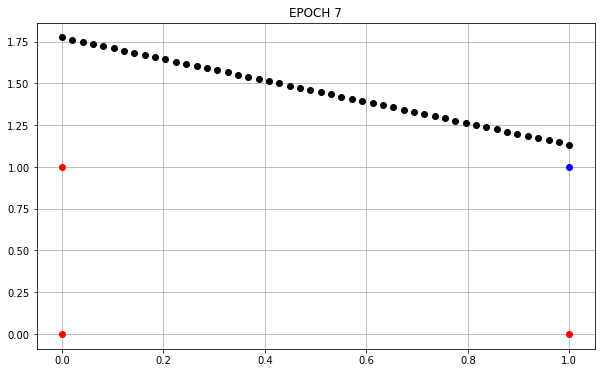

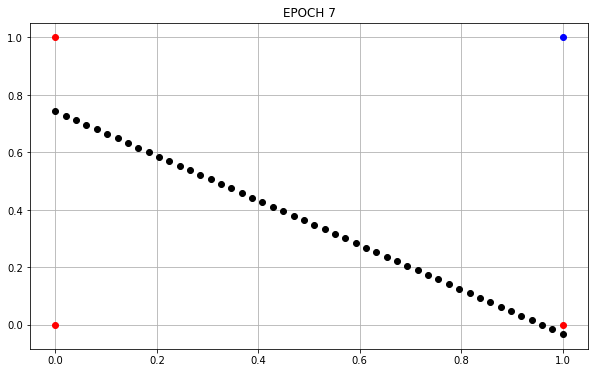

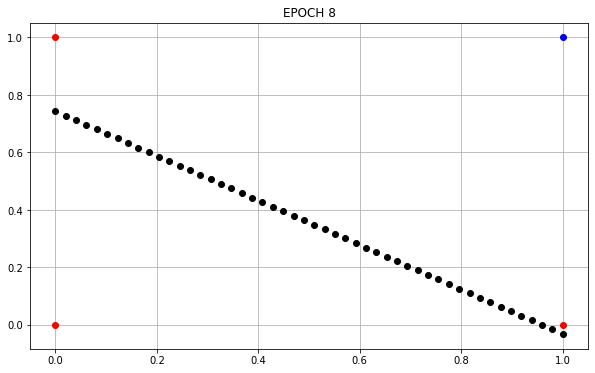

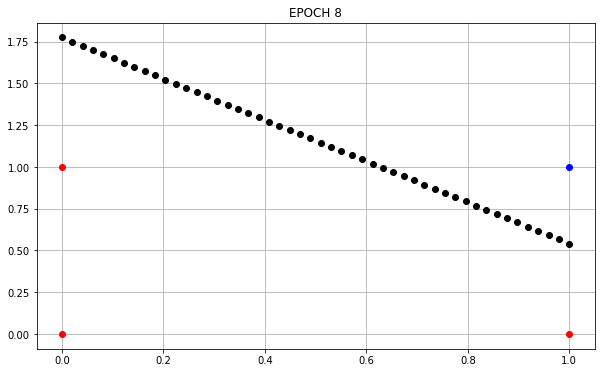

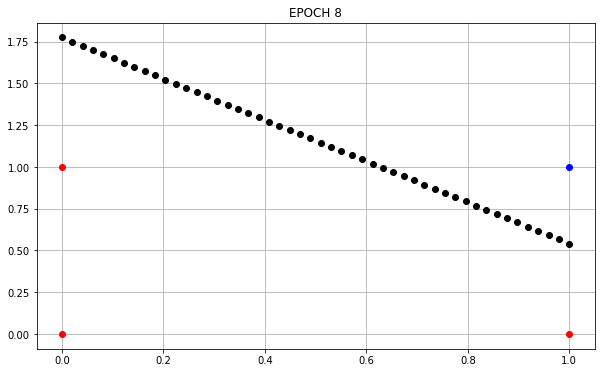

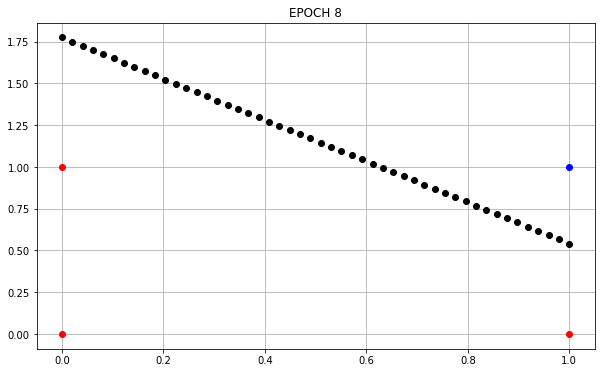

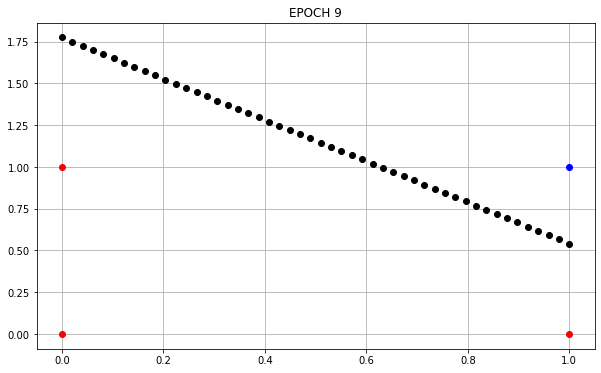

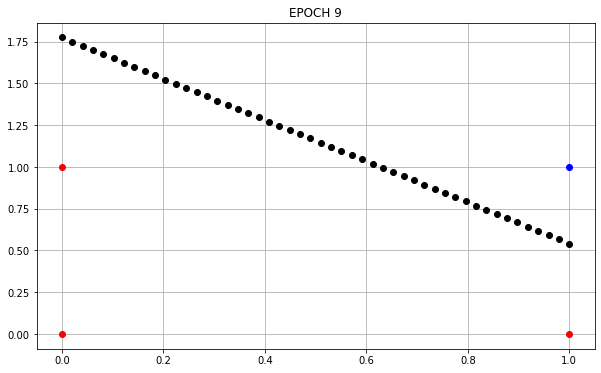

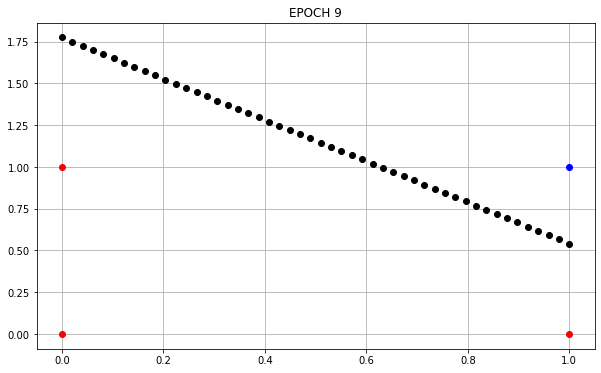

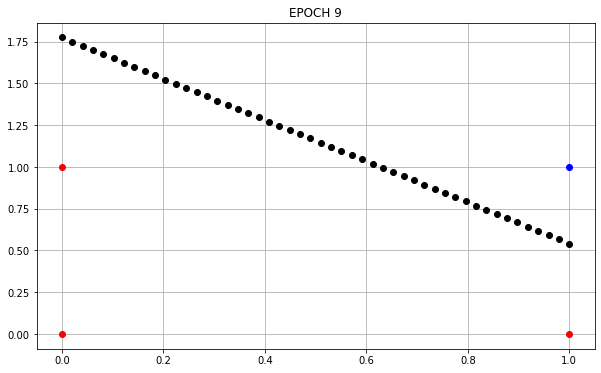

In [14]:
perp = Perceptron(X, Y)
perp.train()

In [15]:
# Test
for i in range(len(X)):
    print(perp.predict(X[i]))

calcNetSum:  -0.2999999999999999
0.0
calcNetSum:  -0.13104288926704652
0.0
calcNetSum:  -0.09153287453513767
0.0
calcNetSum:  0.07742423619781569
1.0


Regression: 0.21(X1) + 0.17(X2) + -0.30
Slope:  -1.2338464155815068 Y-Intercept:  1.7755985450897507


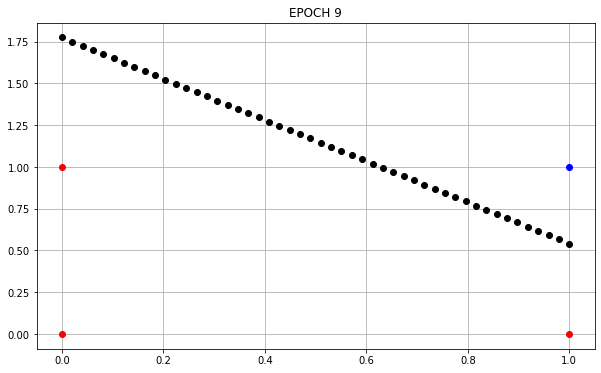

In [16]:
perp.plot_data()

Text(0, 0.5, 'cost')

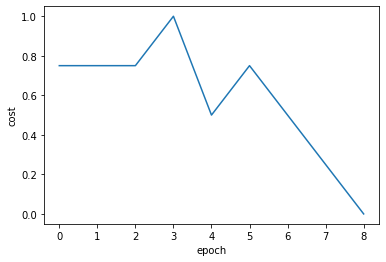

In [17]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')